# Data Aggregation and Group Operations
p345

In [1]:
import numpy as np
import pandas as pd

In [ ]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

In [2]:
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [6]:
%matplotlib inline

## GroupBy Mechanics

In [12]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

data1     data2 key1 key2
0  1.239695 -0.109786    a  one
1 -0.737723  0.031947    a  two
2 -1.167250 -0.867356    b  one
3  1.449556  1.037156    b  two
4  2.164399  1.047967    a  one

##### groupby객체 만으로는 아무것도 안 뜸 ㅇㅇ

In [19]:
#key1기준으로 본 data1. groupby 객체
grouped = df['data1'].groupby(df['key1'])
grouped

In [22]:
dict(list(grouped))

{'a': 0    1.239695
1   -0.737723
4    2.164399
Name: data1, dtype: float64, 'b': 2   -1.167250
3    1.449556
Name: data1, dtype: float64}


In [20]:
# groupby 객체에서 평균값
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [21]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [22]:
type(means)

pandas.core.series.Series

In [30]:
# import pandas as pd

In [53]:
means.unstack()

key2       one       two
key1                    
a     0.880536  0.478943
b    -0.519439 -0.555730

In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Iterating Over Groups

In [14]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [15]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [18]:
pieces = dict(list(df.groupby('key1')))
pieces['b']
# pieces

data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two

In [55]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [56]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.204708  1.393406
1  0.478943  0.092908
2 -0.519439  0.281746
3 -0.555730  0.769023
4  1.965781  1.246435
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [57]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [58]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with Dicts and Series

In [59]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

In [61]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red'}

In [62]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

blue       red
Joe     0.503905  1.063885
Steve   1.297183 -1.553778
Wes    -1.021228 -1.116829
Jim     0.524712  1.770545
Travis -4.230992 -2.405455

In [63]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

blue  red
Joe        2    3
Steve      2    3
Wes        1    2
Jim        2    3
Travis     2    3

### Grouping with Functions

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Grouping by Index Levels

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

## Data Aggregation

In [26]:
df

data1     data2 key1 key2
0  1.239695 -0.109786    a  one
1 -0.737723  0.031947    a  two
2 -1.167250 -0.867356    b  one
3  1.449556  1.037156    b  two
4  2.164399  1.047967    a  one

In [27]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.979458
b    1.187875
Name: data1, dtype: float64

In [29]:
dict(list(grouped))

{'a':       data1     data2 key1 key2
0  1.239695 -0.109786    a  one
1 -0.737723  0.031947    a  two
4  2.164399  1.047967    a  one, 'b':       data1     data2 key1 key2
2 -1.167250 -0.867356    b  one
3  1.449556  1.037156    b  two}

In [15]:
df.groupby('key1')['data1'].quantile(0.9)

### agg는 max, min가능한 숫자만 알아서 연산
그래서 grouped에서 칼럼만 골라내지 않고, 통째로 넣어도 잘 되는 것

In [43]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

data1     data2
key1                    
a     2.902122  1.157753
b     2.616806  1.904513

In [30]:
grouped['data1'].agg(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [31]:
grouped['data1'].apply(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [ ]:
grouped.describe()

### .apply(fct) 는 골라 넣어주지 않으면 에러!
인자에 숫자만 와야 함
> if not,  unsupported operand type(s) for -: 'float' and 'str'

In [17]:
df.groupby('key1')['data1'].apply(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [18]:
df.groupby('key1').apply(peak_to_peak)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

### Column-Wise and Multiple Function Application

#### groupby객체.agg([fct1, fct2, ...])

In [49]:
tips = pd.read_csv('examples/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
5       25.29  4.71     No  Sun  Dinner     4  0.186240

In [50]:
grouped = tips.groupby(['day', 'smoker'])

In [51]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [37]:
grouped.agg([peak_to_peak])

data1        data2
     peak_to_peak peak_to_peak
key1                          
a        2.902122     1.157753
b        2.616806     1.904513

In [42]:
grouped.agg([('최솟',min), 'mean', ('픽2픽',peak_to_peak)])

data1                         data2                    
            최솟      mean       픽2픽        최솟      mean       픽2픽
key1                                                            
a    -0.737723  0.888790  2.902122 -0.109786  0.323376  1.157753
b    -1.167250  0.141153  2.616806 -0.867356  0.084900  1.904513

In [47]:
grouped.agg([('최댓',max), 'mean', 'count'])

data1                     data2                
            최댓      mean count        최댓      mean count
key1                                                    
a     2.164399  0.888790     3  1.047967  0.323376     3
b     1.449556  0.141153     2  1.037156  0.084900     2

In [52]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [53]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [54]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [55]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

##### 차피 (칼럼,fct)할거, 깔끔히 list로
p361

In [57]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<class 'list'>


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [58]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning Aggregated Data Without Row Indexes
p362

In [60]:
tips.groupby(['day', 'smoker'], as_index=True).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [427]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

day smoker  total_bill       tip      size   tip_pct
0   Fri     No   18.420000  2.812500  2.250000  0.151650
1   Fri    Yes   16.813333  2.714000  2.066667  0.174783
2   Sat     No   19.661778  3.102889  2.555556  0.158048
3   Sat    Yes   21.276667  2.875476  2.476190  0.147906
4   Sun     No   20.506667  3.167895  2.929825  0.160113
5   Sun    Yes   24.120000  3.516842  2.578947  0.187250
6  Thur     No   17.113111  2.673778  2.488889  0.160298
7  Thur    Yes   19.190588  3.030000  2.352941  0.163863

## data.groupby(key).transform(fct)
p364

In [436]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

a         b         c         d         e
Joe    -0.165275  2.608034 -0.173721  1.543488  0.005439
Steve   1.122628  0.356349 -0.260007 -0.248941  0.969121
Wes     0.953721       NaN       NaN -0.274360  0.350032
Jim     1.479273 -0.085289  0.855879 -1.201002  0.601366
Travis  0.639231  0.148032  0.832724  1.295909 -0.212503

In [437]:
key= ['one','two','one','two','one']

In [438]:
people.groupby(key).mean()

a         b         c         d         e
one  0.475892  1.378033  0.329502  0.855012  0.047656
two  1.300951  0.135530  0.297936 -0.724972  0.785244

In [439]:
people.groupby(key).transform(np.mean)

a         b         c         d         e
Joe     0.475892  1.378033  0.329502  0.855012  0.047656
Steve   1.300951  0.135530  0.297936 -0.724972  0.785244
Wes     0.475892  1.378033  0.329502  0.855012  0.047656
Jim     1.300951  0.135530  0.297936 -0.724972  0.785244
Travis  0.475892  1.378033  0.329502  0.855012  0.047656

#### 평균값을 빼고 싶다면
뭔소리??

In [440]:
def demean(arr):
    return arr-arr.mean()

In [441]:
demeaned= people.groupby(key).transform(demean)
demeaned

a         b         c         d         e
Joe    -0.641167  1.230001 -0.503223  0.688476 -0.042217
Steve  -0.178323  0.220819 -0.557943  0.476030  0.183878
Wes     0.477828       NaN       NaN -1.129372  0.302376
Jim     0.178323 -0.220819  0.557943 -0.476030 -0.183878
Travis  0.163339 -1.230001  0.503223  0.440897 -0.260159

In [442]:
demeaned.groupby(key).mean()

a             b    c             d    e
one -3.700743e-17  0.000000e+00  0.0 -7.401487e-17  0.0
two -1.110223e-16 -1.387779e-17  0.0  0.000000e+00  0.0

In [451]:
!start .

In [449]:
# %save result/transform.py 436-442

## Apply: General split-apply-combine
p365

In [10]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=16)

total_bill   tip smoker   day    time  size   tip_pct
214       28.17  6.50    Yes   Sat  Dinner     3  0.230742
88        24.71  5.85     No  Thur   Lunch     2  0.236746
174       16.82  4.00    Yes   Sun  Dinner     2  0.237812
194       16.58  4.00    Yes  Thur   Lunch     2  0.241255
185       20.69  5.00     No   Sun  Dinner     5  0.241663
181       23.33  5.65    Yes   Sun  Dinner     2  0.242177
51        10.29  2.60     No   Sun  Dinner     2  0.252672
221       13.42  3.48    Yes   Fri   Lunch     2  0.259314
93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
149        7.51  2.00     No  Thur   Lunch     2  0.266312
109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
232       11.61  3.39     No   Sat  Dinner     2  0.291990
67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [9]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

> apply에 넘기는 함수에 인자를 여럿 넘기는 경우

#### data...apply(fct, param2, param3, ...)

In [452]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            223       15.98   3.00     No   Fri   Lunch     3  0.187735
            99        12.46   1.50     No   Fri  Dinner     2  0.120385
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            23        39.42   7.58     No   Sat  Dinner     4  0.192288
            238       35.83   4.67     No   Sat  Dinner     3  0.130338
            39        31.27   5.00     No   Sat  Dinner     3  0.159898
            239       29.03   5.92     No   Sat  Dinner     3  0.203927
            57        26.41   1.50     No   Sat  Dinner     2  0.056797
            35        24.06   3.60     No   Sat  Dinner     3  0.149626
            28        21.70   4.30     No   Sat  Dinner     2  0.198157
            104       20.92   4.08     No   Sat  Dinner     2  0.195029
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            11        35.26   5.00     No   Sun  Dinner     4  0.141804
            52        34.81   5.20     No   Sun  Dinner     4  0.149382
            47        32.40   6.00     No   Sun  Dinner     4  0.185185
            167       31.71   4.50     No   Sun  Dinner     4  0.141911
            44        30.40   5.60     No   Sun  Dinner     4  0.184211
            116       29.93   5.07     No   Sun  Dinner     4  0.169395
            155       29.85   5.14     No   Sun  Dinner     5  0.172194
            48        28.55   2.05     No   Sun  Dinner     3  0.071804
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            141       34.30   6.70     No  Thur   Lunch     6  0.195335
            125       29.80   4.20     No  Thur   Lunch     6  0.140940
            77        27.20   4.00     No  Thur   Lunch     4  0.147059
            143       27.05   5.00     No  Thur   Lunch     6  0.184843
...                     ...    ...    ...   ...     ...   ...       ...
Yes    Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
            56        38.01   3.00    Yes   Sat  Dinner     4  0.078927
            237       32.83   1.17    Yes   Sat  Dinner     2  0.035638
            219       30.14   3.09    Yes   Sat  Dinner     4  0.102522
            210       30.06   2.00    Yes   Sat  Dinner     3  0.066534
            214       28.17   6.50    Yes   Sat  Dinner     3  0.230742
            216       28.15   3.00    Yes   Sat  Dinner     5  0.106572
            240       27.18   2.00    Yes   Sat  Dinner     2  0.073584
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
            179       34.63   3.55    Yes   Sun  Dinner     2  0.102512
            175       32.90   3.11    Yes   Sun  Dinner     2  0.094529
            173       31.85   3.18    Yes   Sun  Dinner     2  0.099843
            187       30.46   2.00    Yes   Sun  Dinner     5  0.065660
            181       23.33   5.65    Yes   Sun  Dinner     2  0.242177
            183       23.17   6.50    Yes   Sun  Dinner     4  0.280535
            189       23.10   4.00    Yes   Sun  Dinner     3  0.173160
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            192       28.44   2.56    Yes  Thur   Lunch  

In [458]:
result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

f = lambda x: x.describe()
grouped.apply(f)

### Suppressing the Group Keys
groupby 그룹이름을 index로 만들지 않음. group_keys=False

In [461]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
# top(tips, n=16)

In [462]:
tips.groupby('smoker', group_keys=False).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
88        24.71  5.85     No  Thur   Lunch     2  0.236746
185       20.69  5.00     No   Sun  Dinner     5  0.241663
51        10.29  2.60     No   Sun  Dinner     2  0.252672
149        7.51  2.00     No  Thur   Lunch     2  0.266312
232       11.61  3.39     No   Sat  Dinner     2  0.291990
109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [465]:
tips.groupby('smoker', group_keys=True).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

### Quantile and Bucket Analysis
#### 변위치 분석과 버킷분석
p368

In [466]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame

data1     data2
0   -1.403417 -0.573991
1   -0.201379  0.033141
2   -0.221990 -0.213133
3   -0.070069 -1.465230
4    0.206460 -0.165568
5   -0.463194  0.741549
6   -0.083519  1.770889
7    2.170929 -1.197838
8    0.233897 -0.648082
9    0.003892  0.690386
10   2.623219 -0.581225
11   0.484277 -0.289142
12  -0.462849 -0.156698
13   1.770085 -0.173621
14   0.919244 -0.159653
15  -0.206778  0.637737
16  -0.890976  0.122345
17   0.925721  0.070953
18   0.244258  1.294149
19   0.401755 -0.265273
20   0.302675 -1.764322
21   1.395191 -0.873157
22   0.414677 -1.080742
23   1.587376  1.442154
24  -0.157711  0.807363
25   0.111999  1.691185
26  -1.937436  0.349683
27   0.827211  1.034562
28  -0.487211  0.154869
29   0.332632 -0.528911
..        ...       ...
970 -0.658950  0.227913
971  0.171771  0.553094
972 -0.495577 -1.006038
973 -1.004481  0.623120
974  0.170870  0.007824
975 -0.345527 -1.350924
976  0.793776  0.519441
977  1.121731 -0.478090
978  0.884961 -0.378985
979 -0.092293  0.041125
980  0.742203 -0.940925
981 -0.996515  0.965698
982 -0.460526  0.830894
983 -0.726635 -1.387046
984 -0.172757 -0.878605
985 -0.639223 -0.069688
986 -1.789353  0.543290
987  0.822860 -0.478206
988 -0.611411  0.996238
989  1.598814 -0.943636
990 -0.485282 -0.127398
991 -0.642446  0.700983
992  0.694217  0.037945
993 -1.070454  1.489978
994  0.125554 -1.148000
995 -0.646181 -0.434315
996  0.928423 -0.196736
997 -0.067857  0.450335
998  0.955304  0.992082
999  0.180164 -0.590370

[1000 rows x 2 columns]

In [468]:
quartiles = pd.cut(frame.data1, 4)
quartiles

0      (-1.44, 0.0918]
1      (-1.44, 0.0918]
2      (-1.44, 0.0918]
3      (-1.44, 0.0918]
4      (0.0918, 1.624]
5      (-1.44, 0.0918]
6      (-1.44, 0.0918]
7       (1.624, 3.156]
8      (0.0918, 1.624]
9      (-1.44, 0.0918]
10      (1.624, 3.156]
11     (0.0918, 1.624]
12     (-1.44, 0.0918]
13      (1.624, 3.156]
14     (0.0918, 1.624]
15     (-1.44, 0.0918]
16     (-1.44, 0.0918]
17     (0.0918, 1.624]
18     (0.0918, 1.624]
19     (0.0918, 1.624]
20     (0.0918, 1.624]
21     (0.0918, 1.624]
22     (0.0918, 1.624]
23     (0.0918, 1.624]
24     (-1.44, 0.0918]
25     (0.0918, 1.624]
26     (-2.978, -1.44]
27     (0.0918, 1.624]
28     (-1.44, 0.0918]
29     (0.0918, 1.624]
            ...       
970    (-1.44, 0.0918]
971    (0.0918, 1.624]
972    (-1.44, 0.0918]
973    (-1.44, 0.0918]
974    (0.0918, 1.624]
975    (-1.44, 0.0918]
976    (0.0918, 1.624]
977    (0.0918, 1.624]
978    (0.0918, 1.624]
979    (-1.44, 0.0918]
980    (0.0918, 1.624]
981    (-1.44, 0.0918]
982    (-1.

In [469]:
quartiles[:10]

0    (-1.44, 0.0918]
1    (-1.44, 0.0918]
2    (-1.44, 0.0918]
3    (-1.44, 0.0918]
4    (0.0918, 1.624]
5    (-1.44, 0.0918]
6    (-1.44, 0.0918]
7     (1.624, 3.156]
8    (0.0918, 1.624]
9    (-1.44, 0.0918]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.978, -1.44] < (-1.44, 0.0918] < (0.0918, 1.624] < (1.624, 3.156]]

In [471]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)

In [477]:
grouped = frame.data2.groupby(quartiles)

In [478]:
grouped.apply(get_stats)

data1                 
(-2.978, -1.44]  count     80.000000
                 max        2.443808
                 mean       0.165706
                 min       -2.879827
(-1.44, 0.0918]  count    452.000000
                 max        2.741751
                 mean      -0.011044
                 min       -3.462111
(0.0918, 1.624]  count    411.000000
                 max        3.178797
                 mean      -0.081387
                 min       -3.942319
(1.624, 3.156]   count     57.000000
                 max        2.269090
                 mean      -0.183248
                 min       -1.656536
Name: data2, dtype: float64

In [479]:
grouped.apply(get_stats).unstack()

count       max      mean       min
data1                                               
(-2.978, -1.44]   80.0  2.443808  0.165706 -2.879827
(-1.44, 0.0918]  452.0  2.741751 -0.011044 -3.462111
(0.0918, 1.624]  411.0  3.178797 -0.081387 -3.942319
(1.624, 3.156]    57.0  2.269090 -0.183248 -1.656536

In [480]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

count       max      mean       min
data1                                     
0      100.0  2.443808  0.142893 -3.412540
1      100.0  2.741751  0.057415 -3.079084
2      100.0  2.582006 -0.078146 -2.883187
3      100.0  2.079830 -0.149049 -3.462111
4      100.0  2.437535  0.107914 -2.450386
5      100.0  2.336102 -0.056423 -3.942319
6      100.0  3.178797 -0.117671 -2.505761
7      100.0  2.066329 -0.061843 -1.886632
8      100.0  2.068562 -0.088147 -2.121087
9      100.0  2.406391 -0.113247 -1.656536

### Example: Filling Missing Values with Group-Specific       Values

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Example: Random Sampling and Permutation

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group Weighted Average and Correlation

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-Wise Linear Regression

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot Tables and Cross-Tabulation

In [ ]:
tips.pivot_table(index=['day', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

### Cross-Tabulations: Crosstab

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion

## 예제: subway1
1. 각 노선번호 별 승차와 하차의 합 구하기
2. 각 노선번호별 시간에 따른 승차에 대한 증가추이와, 하차에 대한 증가추이를 하나의 피겨에 각각 생성
3. 지하철 운영 회사별 승하차에 대한 평균값 구하기
  ** 서울메트로(2,4호선), 코레일(1,3호선), 도시철도공사(5,6,7,8)!

In [84]:
from pandas import Series, DataFrame
import pandas as pd

In [72]:
# %cd data
# %cd dataAnal_py_basic/pandas
# %cd ..

E:\github\dataAnal_py_basic\pandas


In [88]:
subway= pd.read_csv('data/subway.csv', encoding='cp949')#, nrows=2)
subway.head(3)

노선번호   시간      승차      하차
0  line_1  506   88136   35394
1  line_1  607  114628  195028
2  line_1  708  259282  483162

In [95]:
# subway= pd.read_csv('data/subway.csv', encoding='cp949'
#                    ,parse_dates=["시간"])
# subway.head(3)

노선번호   시간      승차      하차
0  line_1  506   88136   35394
1  line_1  607  114628  195028
2  line_1  708  259282  483162

In [96]:
# type(subway['시간'])

pandas.core.series.Series

### 1

### df [[ ]]. groupby( df [ ] )

In [11]:
sub1ab= subway[['승차','하차']].groupby(subway['노선번호'])

In [12]:
sub1ab.sum()

승차        하차
노선번호                      
line_1   9666934   9430846
line_2  47393885  47983161
line_3  16484269  16555337
line_4  19810776  20053934
line_5  10529597  10650666
line_6  19810776  20053934
line_7  19572699  20642314
line_8  18924212  17843163

In [14]:
sub1ab.sum().sort_values('승차', ascending=False)

승차        하차
노선번호                      
line_2  47393885  47983161
line_4  19810776  20053934
line_6  19810776  20053934
line_7  19572699  20642314
line_8  18924212  17843163
line_3  16484269  16555337
line_5  10529597  10650666
line_1   9666934   9430846

### 2

#### groupby는 당장 뭘 보는 용도로만 쓰고
이것 갖고 딴짓 할 생각 ㄴㄴ. 하려면 df 만들고 하던가

In [95]:
import matplotlib.pyplot as plt

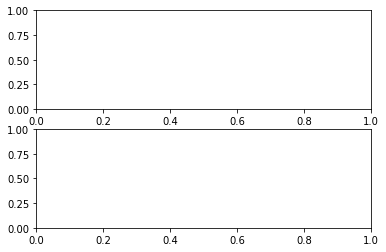

In [126]:
fig, axes= plt.subplots(2,1)

In [94]:
sub1t_on= subway[['승차','시간']].groupby(subway['노선번호'])
sub1t_off= subway[['하차','시간']].groupby(subway['노선번호'])

In [153]:
subDicOn= dict(list(sub1t_on))
subDicOff= dict(list(sub1t_off))

In [111]:
dict(list(sub1t_on))['line_1'].head(3)

승차   시간
0   88136  506
1  114628  607
2  259282  708

In [121]:
dict(list(sub1t_on)).keys()

dict_keys(['line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7', 'line_8'])

In [101]:
type(dict(list(sub1t_on))['line_1'])

pandas.core.frame.DataFrame

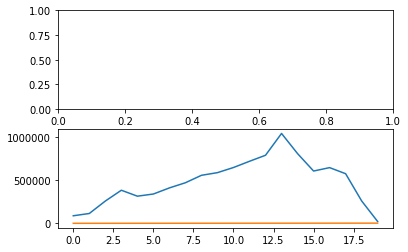

In [148]:
axes[1].plot(dict(list(sub1t_on))['line_1'])
fig

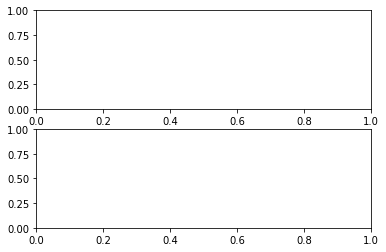

In [154]:
fig.clear()
fig, axes= plt.subplots(2,1)

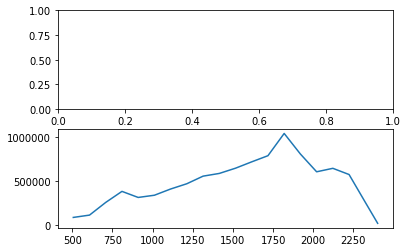

In [150]:
axes[1].plot(dict(list(sub1t_on))['line_1'].set_index('시간'))
fig

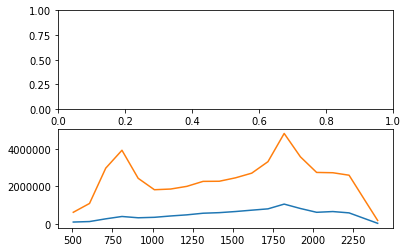

In [151]:
axes[1].plot(dict(list(sub1t_on))['line_2'].set_index('시간'))
fig

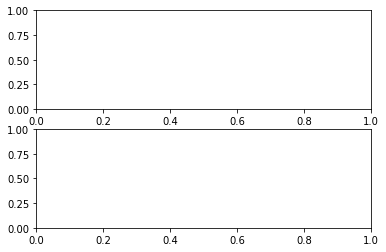

In [163]:
fig.clear()
fig, axes= plt.subplots(2,1)

In [164]:
list(subDicOn.keys())[0]

'line_1'

subDicOn= dict(list(sub1t_on)), 
subDicOff= dict(list(sub1t_off))

axes[1].plot(dict(list(sub1t_on))['line_2'].set_index('시간'))
fig

In [165]:
lines= list(subDicOn.keys())

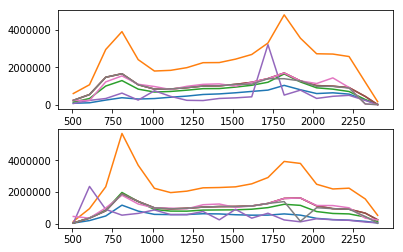

In [166]:
for line in lines:
    axes[0].plot(subDicOn[line].set_index('시간'))
    axes[1].plot(subDicOff[line].set_index('시간'))
fig

### 위 방법의 문제점: 복잡하기도 하고, 범례가 알아서 안 그려진다
plot은 어차피 정보 3개만 있으면 되니, pivot으로 하자

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
subway= pd.read_csv('data/subway.csv', encoding='cp949')#, nrows=2)
subway.head(3)

노선번호   시간      승차      하차
0  line_1  506   88136   35394
1  line_1  607  114628  195028
2  line_1  708  259282  483162

In [27]:
subway.columns

Index(['노선번호', '시간', '승차', '하차'], dtype='object')

In [57]:
subP_on= subway.pivot('노선번호','시간','승차')

In [59]:
subP_on

시간        506      607      708      809      910      1011     1112     1213  \
노선번호                                                                            
line_1   88136   114628   259282   384892   315797   340972   411897   471989   
line_2  608841  1079186  2960789  3914929  2419350  1810982  1847789  1990964   
line_3  149909   344768  1008133  1301035   843939   688982   719544   788290   
line_4  244178   555232  1478641  1666148  1080607   845377   853473   921995   
line_5   76867   243242   343245   632422   259342   756756   456456   246547   
line_6  244178   555232  1478641  1666148  1080607   845377   853473   921995   
line_7  239566   234900  1230585  1549555  1103944   983724   823479   994384   
line_8  244178   555232  1478641  1666148  1080607   845377   853473   921995   

시간         1314     1415     1516     1617     1718     1819     1920  \
노선번호                                                                    
line_1   558377   589343   648960   721442   791417  1044776   810482   
line_2  2256231  2263081  2445765  2694321  3306132  4810661  3565184   
line_3   870152   874658   952321  1050130  1212098  1656305  1227847   
line_4  1010356  1021972  1099173  1208057  1405470  1705617  1282398   
line_5   234566   345677   378521   434244  3221111   526335   790482   
line_6  1010356  1021972  1099173  1208057  1405470  1705617  1282398   
line_7  1099837  1123884   999348  1208057  1405470  1705617  1282398   
line_8  1010356  1021972  1099173  1108057  1399470  1400317  1282398   

시간         2021     2122     2223     2324    2401  
노선번호                                                
line_1   608066   647624   576958   260729   21167  
line_2  2732977  2716860  2584664  1212806  172373  
line_3   913682   842636   717158   288744   33938  
line_4  1034818  1001286   925633   452658   17687  
line_5   348066   460624   512958   240789   21347  
line_6  1034818  1001286   925633   452658   17687  
line_7  1143244  1444442   932454    45466   22345  
line_8   994385   992340   903243    54356   12494

In [28]:
subP_on_T= subway.pivot('노선번호','시간','승차').T
subP_off_T= subway.pivot('노선번호','시간','하차').T

### 시간이 행, 범례 대상이 컬럼으로 되어야!

In [75]:
subP_on_T.head(3)

노선번호  line_1   line_2   line_3   line_4  line_5   line_6   line_7   line_8
시간                                                                        
506    88136   608841   149909   244178   76867   244178   239566   244178
607   114628  1079186   344768   555232  243242   555232   234900   555232
708   259282  2960789  1008133  1478641  343245  1478641  1230585  1478641

In [80]:
# pd.to_datetime(subP_on_T.index)
type(subP_on_T.index)

pandas.core.indexes.numeric.Int64Index

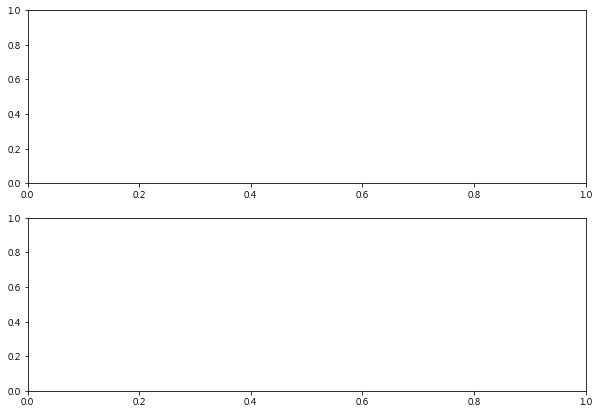

In [140]:
fig.clear('all')
fig, axes= plt.subplots(2,1)
fig.set_size_inches(10,7)

In [141]:
#ㄴㄴ plt.rc('fig',figsize=(8,10))
plt.rc('font', family='Malgun Gothic')
plt.rc('legend', fontsize=10)

In [73]:
# subP_on_T.plot(ax=axes[0])
# subP_off_T.plot(ax=axes[1])
# fig

#### x축 hour, min을 좀더 알아보기 쉽게 바꾸고픔
05:30 ~ 12:30

### 일단 눈금 바꾸는 방법부터?
- p315
- axex[0].set_xticks

In [93]:
# subP_on_T.plot?

In [92]:
# ff= lambda x: ""
subP_on_T.index

Int64Index([ 506,  607,  708,  809,  910, 1011, 1112, 1213, 1314, 1415, 1516,
            1617, 1718, 1819, 1920, 2021, 2122, 2223, 2324, 2401],
           dtype='int64', name='시간')

In [145]:
indN= ["%02d:%02d"%(i,j) for i,j in zip(range(5,25),range(6,25))]
indN.append('24:01')
indN

['05:06',
 '06:07',
 '07:08',
 '08:09',
 '09:10',
 '10:11',
 '11:12',
 '12:13',
 '13:14',
 '14:15',
 '15:16',
 '16:17',
 '17:18',
 '18:19',
 '19:20',
 '20:21',
 '21:22',
 '22:23',
 '23:24',
 '24:01']

In [150]:
type(indN)

list

In [149]:
# int64index(indN)

NameError: name 'int64index' is not defined

In [91]:
#인자가 숫자라 안됨 re.sub(subP_on_T.index,'\d{2}$','')

In [153]:
type(xtick1)

pandas.core.indexes.numeric.Int64Index

In [154]:
# 실행할때마다 범례가 늘어나는 에러가 있음. clear 해줘야!
subP_on_T.plot(ax=axes[0], xticks= xtick1)#, figsize=(8,10))
subP_off_T.plot(ax=axes[1])#, figsize=(8,10))#, xticks= indN)
fig

AttributeError: 'NoneType' object has no attribute 'seq'

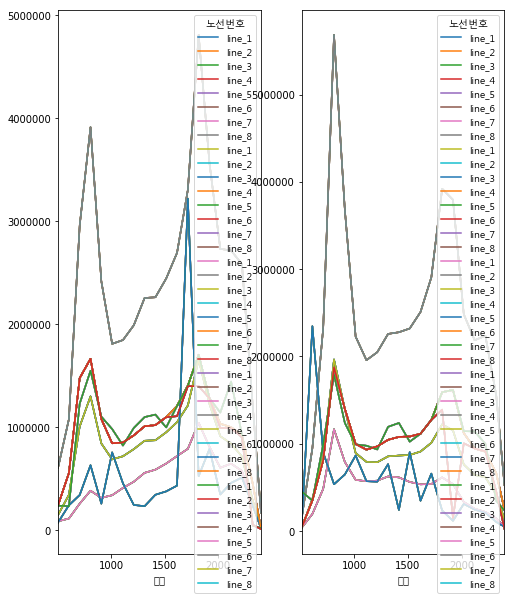

In [54]:
axes[0].plot(subP_on_T)
axes[1].plot(subP_off_T)
fig

### seaborn으로도 해보자

In [98]:
import seaborn as sns

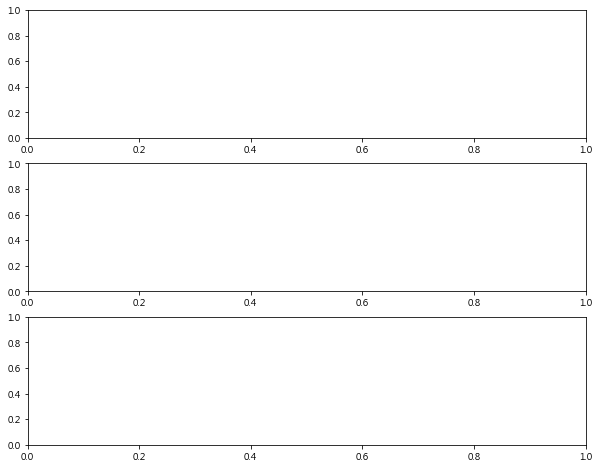

In [135]:
fig, axes= plt.subplots(3,1)
fig.set_size_inches(10,8)

In [119]:
subway.head(3)

노선번호   시간      승차      하차
0  line_1  506   88136   35394
1  line_1  607  114628  195028
2  line_1  708  259282  483162

In [124]:
%matplotlib inline

In [129]:
sns.barplot(data=subway, x="시간",y="승차", ax=axes[0])

In [133]:
sns.pointplot(data=subway, x='시간', y='승차', ax=axes[1])

In [136]:
axes[2].plot(subway, x='')

In [138]:
axes[2].plot?

Object `plot` not found.


In [ ]:
axes[2].plot

#### sns.barplot?
인자 순서가 x, y, hue, data, ... 라서 명시해줘야 제대로 먹힘

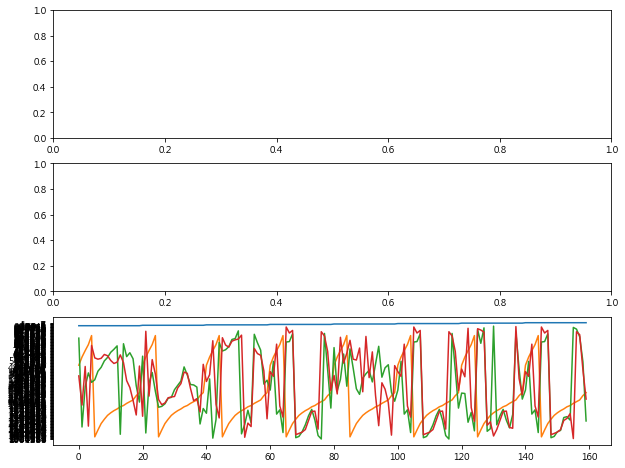

In [137]:
fig

In [131]:
pd.MultiIndex?

## 예제: subway2
1. 각 시간대 별 승차와 합차의 평균과 합을 나타내세요
2. 각 역별 전체 승차와 합차의 평균과 합을 나타내세요
3. 각 시간대 별 승차수가 가장 높은 역을 나타내세요
4. 승차가 가장 많은 top 10개의 역을 구하고 각 역의 시간대별 승차의 증감추세를 도표화 하여라
5. 각 역별 마지막 시간(24~01) 승차수와 첫시간(05~06) 승차수의 차이를 구하여라.

In [62]:
!start .

In [82]:
xls_file= pd.ExcelFile('data/subway2.xlsx')
# xls_file.sheet_names[0]
subwayy= xls_file.parse(xls_file.sheet_names[0], skiprows=1)

In [116]:
subwayy

전체  구분  05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13  \
0    서울역(1)  승차  17465  18434   50313   93398   78705  86342  93585  97707   
1       NaN  하차   7829  48553  110250  233852  121983  79628  75577  70984   
2    시 청(1)  승차   2993   4473    7633   10404   13328  16953  25467  27265   
3       NaN  하차   4142  19730   67995  175458   83777  48363  47519  42646   
4       종 각  승차   7371   7836   14545   24578   23691  32290  47470  57187   
5       NaN  하차   4861  29757   93579  245221  153933  88680  83402  78253   
6    종로3(1)  승차   7683   6733   11103   20647   20878  32775  46390  62213   
7       NaN  하차   2119  18872   34622  103951  110831  95839  93370  97363   
8      종로5가  승차   3159   4416    8070   12328   16909  24445  34454  43485   
9       NaN  하차   2977  14274   51907  127936   93821  67136  63338  61557   
10      동대문  승차  13570  14955   28139   32650   28878  25619  25431  30289   
11      NaN  하차   3176  11703   18818   41963   39519  38817  42117  45097   
12   신설동(1)  승차   7379  11384   24936   33848   24614  22337  25357  29247   
13      NaN  하차   1991   9248   33809   77567   52622  33818  29901  31321   
14      제기동  승차   5432  10675   25372   32579   26940  28781  34569  39531   
15      NaN  하차   2562  14188   21419   53022   39372  44734  47875  53633   
16      청량리  승차  20318  32688   83208  117006   75323  65009  70401  71667   
17      NaN  하차   5307  24967   41351   72675   74262  74185  72502  77895   
18      동묘앞  승차   2779   3034    5963    7454    6531   6421   8773  13398   
19      NaN  하차    430   3736    9412   34058   21584  14559  14944  18318   
20   시 청(2)  승차   2035   3074    8395   11645   14225  18935  26720  26947   
21      NaN  하차   1776  17387   97659  216553   81613  40417  38851  35886   
22     을지입구  승차   2466   2358    5710    9584   15440  21197  32455  39058   
23      NaN  하차   1832  19798   95314  301554  161928  78929  79215  78458   
24   을지3(2)  승차   1029   2127    4082    6641    9357  12763  15863  18037   
25      NaN  하차   1034  11296   39207  116054   64935  35232  27715  22540   
26     을지4가  승차    896   2015    3572    5919    9319  12726  16408  19145   
27      NaN  하차    961   8790   26713   93562   59011  33157  29525  25108   
28    동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   
29      NaN  하차    933  11717   28801   67006   38118  37690  39403  41140   
..      ...  ..    ...    ...     ...     ...     ...    ...    ...    ...   
202     혜 화  승차   8005  12474   23966   32789   30078  35675  45545  53687   
203     NaN  하차   2290  19882   62504  132271  119734  87539  73473  84916   
204  동대문(4)  승차   9310   7986    8221   12079   17372  25519  33745  40287   
205     NaN  하차   1978  20057   57357  106973   90016  68208  58306  51652   
206   동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   
207     NaN  하차   1399  14448   26314   76158   52944  44263  40325  41603   
208     충무로  승차   4315   6134   12046   19378   23025  25805  33119  38350   
209     NaN  하차   2590  21882   66441  256759  153897  82629  64220  57855   
210     명 동  승차   1299   2458    4511    7598   13222  17568  25781  33864   
211     NaN  하차   1072  17662   54675  155827  118988  79032  73688  85987   
212     회 현  승차   4074   6357   10229   14269   18009  24895  38682  54125   
213     NaN  하차   1663  25894   57322  161902  135213  85434  92971  86007   
214  서울역(4)  승차   3044   4219    7803   13936   11492  11342  12434  12329   
215     NaN  하차    905  14106   28385   59567   35804  24805  24133  24750   
216     숙 대  승차   6120  11212   27701   39447   26357  21873  24197  26399   
217     NaN  하차   1255  11777   35835   88771   48736  36972  28704  29820   
218     삼각지  승차    842   2094    5724    8746    6646   5414   5875   7871   
219     NaN  하차    731   6472   16253   35249   15359  12181  12360  12624   
220     신용산  승차   2722   6150   15073   20559   17534  16679  20083  21518   
221     NaN  하차   1152  10714  

In [134]:
subwayy= subwayy.fillna(method='ffill')
subwayy

전체  구분  05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13  \
0    서울역(1)  승차  17465  18434   50313   93398   78705  86342  93585  97707   
1    서울역(1)  하차   7829  48553  110250  233852  121983  79628  75577  70984   
2    시 청(1)  승차   2993   4473    7633   10404   13328  16953  25467  27265   
3    시 청(1)  하차   4142  19730   67995  175458   83777  48363  47519  42646   
4       종 각  승차   7371   7836   14545   24578   23691  32290  47470  57187   
5       종 각  하차   4861  29757   93579  245221  153933  88680  83402  78253   
6    종로3(1)  승차   7683   6733   11103   20647   20878  32775  46390  62213   
7    종로3(1)  하차   2119  18872   34622  103951  110831  95839  93370  97363   
8      종로5가  승차   3159   4416    8070   12328   16909  24445  34454  43485   
9      종로5가  하차   2977  14274   51907  127936   93821  67136  63338  61557   
10      동대문  승차  13570  14955   28139   32650   28878  25619  25431  30289   
11      동대문  하차   3176  11703   18818   41963   39519  38817  42117  45097   
12   신설동(1)  승차   7379  11384   24936   33848   24614  22337  25357  29247   
13   신설동(1)  하차   1991   9248   33809   77567   52622  33818  29901  31321   
14      제기동  승차   5432  10675   25372   32579   26940  28781  34569  39531   
15      제기동  하차   2562  14188   21419   53022   39372  44734  47875  53633   
16      청량리  승차  20318  32688   83208  117006   75323  65009  70401  71667   
17      청량리  하차   5307  24967   41351   72675   74262  74185  72502  77895   
18      동묘앞  승차   2779   3034    5963    7454    6531   6421   8773  13398   
19      동묘앞  하차    430   3736    9412   34058   21584  14559  14944  18318   
20   시 청(2)  승차   2035   3074    8395   11645   14225  18935  26720  26947   
21   시 청(2)  하차   1776  17387   97659  216553   81613  40417  38851  35886   
22     을지입구  승차   2466   2358    5710    9584   15440  21197  32455  39058   
23     을지입구  하차   1832  19798   95314  301554  161928  78929  79215  78458   
24   을지3(2)  승차   1029   2127    4082    6641    9357  12763  15863  18037   
25   을지3(2)  하차   1034  11296   39207  116054   64935  35232  27715  22540   
26     을지4가  승차    896   2015    3572    5919    9319  12726  16408  19145   
27     을지4가  하차    961   8790   26713   93562   59011  33157  29525  25108   
28    동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   
29    동운(2)  하차    933  11717   28801   67006   38118  37690  39403  41140   
..      ...  ..    ...    ...     ...     ...     ...    ...    ...    ...   
202     혜 화  승차   8005  12474   23966   32789   30078  35675  45545  53687   
203     혜 화  하차   2290  19882   62504  132271  119734  87539  73473  84916   
204  동대문(4)  승차   9310   7986    8221   12079   17372  25519  33745  40287   
205  동대문(4)  하차   1978  20057   57357  106973   90016  68208  58306  51652   
206   동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   
207   동운(4)  하차   1399  14448   26314   76158   52944  44263  40325  41603   
208     충무로  승차   4315   6134   12046   19378   23025  25805  33119  38350   
209     충무로  하차   2590  21882   66441  256759  153897  82629  64220  57855   
210     명 동  승차   1299   2458    4511    7598   13222  17568  25781  33864   
211     명 동  하차   1072  17662   54675  155827  118988  79032  73688  85987   
212     회 현  승차   4074   6357   10229   14269   18009  24895  38682  54125   
213     회 현  하차   1663  25894   57322  161902  135213  85434  92971  86007   
214  서울역(4)  승차   3044   4219    7803   13936   11492  11342  12434  12329   
215  서울역(4)  하차    905  14106   28385   59567   35804  24805  24133  24750   
216     숙 대  승차   6120  11212   27701   39447   26357  21873  24197  26399   
217     숙 대  하차   1255  11777   35835   88771   48736  36972  28704  29820   
218     삼각지  승차    842   2094    5724    8746    6646   5414   5875   7871   
219     삼각지  하차    731   6472   16253   35249   15359  12181  12360  12624   
220     신용산  승차   2722   6150   15073   20559   17534  16679  20083  21518   
221     신용산  하차   1152  10714  

In [138]:
#df.set_index(['year', 'month'])
subwayy.set_index(['전체', '구분'])

05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13   13~14  \
전체     구분                                                                      
서울역(1) 승차  17465  18434   50313   93398   78705  86342  93585  97707  102608   
       하차   7829  48553  110250  233852  121983  79628  75577  70984   80388   
시 청(1) 승차   2993   4473    7633   10404   13328  16953  25467  27265   36393   
       하차   4142  19730   67995  175458   83777  48363  47519  42646   45465   
종 각    승차   7371   7836   14545   24578   23691  32290  47470  57187   76131   
       하차   4861  29757   93579  245221  153933  88680  83402  78253   84694   
종로3(1) 승차   7683   6733   11103   20647   20878  32775  46390  62213   79812   
       하차   2119  18872   34622  103951  110831  95839  93370  97363  106736   
종로5가   승차   3159   4416    8070   12328   16909  24445  34454  43485   56337   
       하차   2977  14274   51907  127936   93821  67136  63338  61557   63166   
동대문    승차  13570  14955   28139   32650   28878  25619  25431  30289   33404   
       하차   3176  11703   18818   41963   39519  38817  42117  45097   45292   
신설동(1) 승차   7379  11384   24936   33848   24614  22337  25357  29247   32778   
       하차   1991   9248   33809   77567   52622  33818  29901  31321   33285   
제기동    승차   5432  10675   25372   32579   26940  28781  34569  39531   46276   
       하차   2562  14188   21419   53022   39372  44734  47875  53633   58264   
청량리    승차  20318  32688   83208  117006   75323  65009  70401  71667   78177   
       하차   5307  24967   41351   72675   74262  74185  72502  77895   86168   
동묘앞    승차   2779   3034    5963    7454    6531   6421   8773  13398   16461   
       하차    430   3736    9412   34058   21584  14559  14944  18318   21588   
시 청(2) 승차   2035   3074    8395   11645   14225  18935  26720  26947   34564   
       하차   1776  17387   97659  216553   81613  40417  38851  35886   41671   
을지입구   승차   2466   2358    5710    9584   15440  21197  32455  39058   59700   
       하차   1832  19798   95314  301554  161928  78929  79215  78458   84275   
을지3(2) 승차   1029   2127    4082    6641    9357  12763  15863  18037   22419   
       하차   1034  11296   39207  116054   64935  35232  27715  22540   25083   
을지4가   승차    896   2015    3572    5919    9319  12726  16408  19145   23808   
       하차    961   8790   26713   93562   59011  33157  29525  25108   24848   
동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   30351   
       하차    933  11717   28801   67006   38118  37690  39403  41140   47159   
...          ...    ...     ...     ...     ...    ...    ...    ...     ...   
혜 화    승차   8005  12474   23966   32789   30078  35675  45545  53687   62295   
       하차   2290  19882   62504  132271  119734  87539  73473  84916  100558   
동대문(4) 승차   9310   7986    8221   12079   17372  25519  33745  40287   50976   
       하차   1978  20057   57357  106973   90016  68208  58306  51652   52458   
동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   32868   
       하차   1399  14448   26314   76158   52944  44263  40325  41603   46757   
충무로    승차   4315   6134   12046   19378   23025  25805  33119  38350   49987   
       하차   2590  21882   66441  256759  153897  82629  64220  57855   60923   
명 동    승차   1299   2458    4511    7598   13222  17568  25781  33864   45213   
       하차   1072  17662   54675  155827  118988  79032  73688  85987   97166   
회 현    승차   4074   6357   10229   14269   18009  24895  38682  54125   70701   
       하차   1663  25894   57322  161902  135213  85434  92971  86007   79917   
서울역(4) 승차   3044   4219    7803   13936   11492  11342  12434  12329   13101   
       하차    905  14106   28385   59567   35804  24805  24133  24750   29806   
숙 대    승차   6120  11212   27701   39447   26357  21873  24197  26399   31520   
       하차   1255  11777   35835   88771   48736  36972  28704  29820   28606   
삼각지    승차    842   2094    5724    8746    6646   5414   5875   7871    9804   
       하차  

### 1

In [139]:
subwayy.groupby('구분').agg(['mean',sum])

05~06                  06~07                  07~08           \
           mean      sum          mean      sum          mean      sum   
구분                                                                       
승차  9405.836207  1091077  18050.577586  2093867  49198.370690  5707011   
하차  2130.068966   247088  16028.560345  1859313  38599.603448  4477554   

           08~09                   09~10            ...           20~21  \
            mean       sum          mean      sum   ...            mean   
구분                                                  ...                   
승차  62648.491379   7267225  40170.689655  4659800   ...    45600.301724   
하차  92151.870690  10689617  62685.275862  7271492   ...    40527.379310   

                    21~22                  22~23                  23~24  \
        sum          mean      sum          mean      sum          mean   
구분                                                                        
승차  5289635  44900.741379  5208486  41417.836207  4804469  19094.534483   
하차  4701176  34739.646552  4029799  34290.172414  3977660  23983.120690   

                   24~01          
        sum         mean     sum  
구분                                
승차  2214966  2460.784483  285451  
하차  2782042  7922.870690  919053  

[2 rows x 40 columns]

### 2
이게 답이 아니네

In [140]:
# dict(list(subwayy.groupby('전체')))
subwayy.groupby('전체').agg(['mean',sum])

05~06           06~07             07~08             08~09          \
           mean    sum     mean     sum      mean     sum      mean     sum   
전체                                                                            
강 남     14519.0  29038  60302.5  120605  138352.0  276704  250912.5  501825   
강 변      8489.0  16978  42993.5   85987   95184.0  190368  141252.5  282505   
건 대     13031.5  26063  30071.0   60142   63752.0  127504  116087.0  232174   
경복궁      2555.5   5111  11536.5   23073   38127.5   76255   83014.0  166028   
고속터미     7791.5  15583  32417.5   64835   56256.5  112513   87615.0  175230   
교대(2)    4547.5   9095  24806.5   49613   70545.5  141091  122220.0  244440   
교대(3)     944.5   1889   5283.5   10567   22578.0   45156   37368.0   74736   
구 의      7504.5  15009  18126.0   36252   48650.0   97300   91245.5  182491   
구로공단    28194.5  56389  43951.5   87903  114876.5  229753  230147.0  460294   
구파발      2683.5   5367  17061.5   34123   33284.5   66569   36037.5   72075   
금 호      4060.0   8120  10025.0   20050   22107.5   44215   36431.5   72863   
길 음      7458.5  14917  24748.5   49497   65116.0  130232   86993.5  173987   
낙성대      7675.5  15351  22769.0   45538   65639.5  131279  102863.5  205727   
남부터미     2174.0   4348  20037.5   40075   46128.0   92256  114282.0  228564   
남태령       232.5    465   1131.0    2262    2634.5    5269    4697.5    9395   
노 원      7064.5  14129  21842.5   43685   49170.5   98341   61606.5  123213   
녹 번      5842.5  11685  15857.0   31714   47496.5   94993   65096.0  130192   
당 산     10307.5  20615  34922.5   69845   90132.0  180264  133025.5  266051   
당고개      6156.0  12312  14802.0   29604   37147.0   74294   40706.0   81412   
대 림     24676.5  49353  31364.5   62729   70791.5  141583  110780.5  221561   
대 청      2467.5   4935   9544.0   19088   30546.0   61092   35943.5   71887   
대 치      1338.0   2676  10260.0   20520   26381.0   52762   28793.0   57586   
도 곡      1286.5   2573   5718.0   11436   19952.5   39905   27474.5   54949   
도림천       295.0    590    858.5    1717    1931.5    3863    3123.5    6247   
독립문      3859.5   7719   8144.0   16288   20736.5   41473   28591.0   57182   
동 대      1465.0   2930   6059.5   12119   13012.0   26024   40215.0   80430   
동 작       508.5   1017   3557.5    7115    7202.0   14404   13538.0   27076   
동대문      8373.0  16746  13329.0   26658   23478.5   46957   37306.5   74613   
동대문(4)   5644.0  11288  14021.5   28043   32789.0   65578   59526.0  119052   
동묘앞      1604.5   3209   3385.0    6770    7687.5   15375   20756.0   41512   
...         ...    ...      ...     ...       ...     ...       ...     ...   
용두역       533.5   1067   1370.0    2740    3578.5    7157    5306.5   10613   
을지3(2)   1031.5   2063   6711.5   13423   21644.5   43289   61347.5  122695   
을지3(3)    613.5   1227   2980.0    5960   10811.0   21622   37884.0   75768   
을지4가      928.5   1857   5402.5   10805   15142.5   30285   49740.5   99481   
을지입구     2149.0   4298  11078.0   22156   50512.0  101024  155569.0  311138   
이 대      4605.5   9211  11027.0   22054   29702.0   59404   56728.0  113456   
이 촌       906.0   1812   8059.5   16119   16094.5   32189   27110.5   54221   
일 원      1226.5   2453   8702.0   17404   22646.0   45292   23607.0   47214   
잠 실     10095.0  20190  43973.0   87946  129522.5  259045  208928.0  417856   
잠 원       869.5   1739   5044.0   10088   12651.5   25303   19435.5   38871   
제기동      3997.0   7994  12431.5   24863   23395.5   46791   42800.5   85601   
종 각      6116.0  12232  18796.5   37593   54062.0  108124  134899.5  269799   
종로3(1)   4901.0   9802  12802.5   25605   22862.5   45725   62299.0  124598   
종로3(3)    623.0   1246   2503.0    5006    6245.5   12491   20314.0   40628   
종로5가     3068.0   6136   9345.0   18690   29988.5   59977   70132.0  140264   
종합운동     1852.5   3705  12484.0   24968   31445.0   62890   45930.0   91860   
지 축       980.5   1961   3449.5    6899    7713.0   15426   

### 3

In [143]:
subwayy_si= subwayy.set_index(['전체', '구분'])
subwayy_si

05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13   13~14  \
전체     구분                                                                      
서울역(1) 승차  17465  18434   50313   93398   78705  86342  93585  97707  102608   
       하차   7829  48553  110250  233852  121983  79628  75577  70984   80388   
시 청(1) 승차   2993   4473    7633   10404   13328  16953  25467  27265   36393   
       하차   4142  19730   67995  175458   83777  48363  47519  42646   45465   
종 각    승차   7371   7836   14545   24578   23691  32290  47470  57187   76131   
       하차   4861  29757   93579  245221  153933  88680  83402  78253   84694   
종로3(1) 승차   7683   6733   11103   20647   20878  32775  46390  62213   79812   
       하차   2119  18872   34622  103951  110831  95839  93370  97363  106736   
종로5가   승차   3159   4416    8070   12328   16909  24445  34454  43485   56337   
       하차   2977  14274   51907  127936   93821  67136  63338  61557   63166   
동대문    승차  13570  14955   28139   32650   28878  25619  25431  30289   33404   
       하차   3176  11703   18818   41963   39519  38817  42117  45097   45292   
신설동(1) 승차   7379  11384   24936   33848   24614  22337  25357  29247   32778   
       하차   1991   9248   33809   77567   52622  33818  29901  31321   33285   
제기동    승차   5432  10675   25372   32579   26940  28781  34569  39531   46276   
       하차   2562  14188   21419   53022   39372  44734  47875  53633   58264   
청량리    승차  20318  32688   83208  117006   75323  65009  70401  71667   78177   
       하차   5307  24967   41351   72675   74262  74185  72502  77895   86168   
동묘앞    승차   2779   3034    5963    7454    6531   6421   8773  13398   16461   
       하차    430   3736    9412   34058   21584  14559  14944  18318   21588   
시 청(2) 승차   2035   3074    8395   11645   14225  18935  26720  26947   34564   
       하차   1776  17387   97659  216553   81613  40417  38851  35886   41671   
을지입구   승차   2466   2358    5710    9584   15440  21197  32455  39058   59700   
       하차   1832  19798   95314  301554  161928  78929  79215  78458   84275   
을지3(2) 승차   1029   2127    4082    6641    9357  12763  15863  18037   22419   
       하차   1034  11296   39207  116054   64935  35232  27715  22540   25083   
을지4가   승차    896   2015    3572    5919    9319  12726  16408  19145   23808   
       하차    961   8790   26713   93562   59011  33157  29525  25108   24848   
동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   30351   
       하차    933  11717   28801   67006   38118  37690  39403  41140   47159   
...          ...    ...     ...     ...     ...    ...    ...    ...     ...   
혜 화    승차   8005  12474   23966   32789   30078  35675  45545  53687   62295   
       하차   2290  19882   62504  132271  119734  87539  73473  84916  100558   
동대문(4) 승차   9310   7986    8221   12079   17372  25519  33745  40287   50976   
       하차   1978  20057   57357  106973   90016  68208  58306  51652   52458   
동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   32868   
       하차   1399  14448   26314   76158   52944  44263  40325  41603   46757   
충무로    승차   4315   6134   12046   19378   23025  25805  33119  38350   49987   
       하차   2590  21882   66441  256759  153897  82629  64220  57855   60923   
명 동    승차   1299   2458    4511    7598   13222  17568  25781  33864   45213   
       하차   1072  17662   54675  155827  118988  79032  73688  85987   97166   
회 현    승차   4074   6357   10229   14269   18009  24895  38682  54125   70701   
       하차   1663  25894   57322  161902  135213  85434  92971  86007   79917   
서울역(4) 승차   3044   4219    7803   13936   11492  11342  12434  12329   13101   
       하차    905  14106   28385   59567   35804  24805  24133  24750   29806   
숙 대    승차   6120  11212   27701   39447   26357  21873  24197  26399   31520   
       하차   1255  11777   35835   88771   48736  36972  28704  29820   28606   
삼각지    승차    842   2094    5724    8746    6646   5414   5875   7871    9804   
       하차  

In [144]:
subwayy_si.max(0)

05~06     49677
06~07     96328
07~08    280681
08~09    433981
09~10    304197
10~11    157500
11~12    134063
12~13    127664
13~14    153040
14~15    149648
15~16    162306
16~17    174384
17~18    228344
18~19    343805
19~20    267534
20~21    209983
21~22    258682
22~23    284400
23~24    132661
24~01     46582
dtype: int64

In [146]:
subwayy_si.groupby('구분').agg(max)

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
구분                                                                         
승차  49677  96328  280681  371548  188839  108599  104340  111468  145307   
하차  13122  90820  216887  433981  304197  157500  134063  127664  153040   

     14~15   15~16   16~17   17~18   18~19   19~20   20~21   21~22   22~23  \
구분                                                                           
승차  141569  162306  174384  228344  343805  265809  209983  258682  284400   
하차  149648  147091  151427  187498  270297  267534  189693  175710  186677   

     23~24  24~01  
구분                 
승차  130027  19676  
하차  132661  46582

### 4

In [151]:
# import numpy as np
# subwayy_si.sort_values(by='구분')
# np.vectorize(top)(subwayy_si, 10, ???)

In [179]:
from pandas import DataFrame

In [176]:
# subwayy_si.index

In [188]:
print(type(subwayy_si.sum(1)))
subwayy_si.sum(1)

<class 'pandas.core.series.Series'>


전체      구분
서울역(1)  승차    1830134
        하차    1565575
시 청(1)  승차     808764
        하차     835631
종 각     승차    1604404
        하차    1516661
종로3(1)  승차    1318846
        하차    1253743
종로5가    승차     850040
        하차     849075
동대문     승차     545802
        하차     649673
신설동(1)  승차     544356
        하차     547492
제기동     승차     627924
        하차     648500
청량리     승차    1301636
        하차    1306989
동묘앞     승차     235041
        하차     257507
시 청(2)  승차     780471
        하차     865364
을지입구    승차    1425862
        하차    1438643
을지3(2)  승차     449109
        하차     480325
을지4가    승차     411232
        하차     419762
동운(2)   승차     623871
        하차     707384
               ...   
혜 화     승차    1377644
        하차    1513339
동대문(4)  승차     859248
        하차     815688
동운(4)   승차     721610
        하차     724177
충무로     승차    1069630
        하차    1139513
명 동     승차    1213799
        하차    1336816
회 현     승차     992761
        하차    1058552
서울역(4)  승차     241108
        하차     537250

In [196]:
DataFrame.xs?

In [222]:
subwayy_si.sum(1).sort_values

<bound method Series.sort_values of 전체      구분
서울역(1)  승차    1830134
        하차    1565575
시 청(1)  승차     808764
        하차     835631
종 각     승차    1604404
        하차    1516661
종로3(1)  승차    1318846
        하차    1253743
종로5가    승차     850040
        하차     849075
동대문     승차     545802
        하차     649673
신설동(1)  승차     544356
        하차     547492
제기동     승차     627924
        하차     648500
청량리     승차    1301636
        하차    1306989
동묘앞     승차     235041
        하차     257507
시 청(2)  승차     780471
        하차     865364
을지입구    승차    1425862
        하차    1438643
을지3(2)  승차     449109
        하차     480325
을지4가    승차     411232
        하차     419762
동운(2)   승차     623871
        하차     707384
               ...   
혜 화     승차    1377644
        하차    1513339
동대문(4)  승차     859248
        하차     815688
동운(4)   승차     721610
        하차     724177
충무로     승차    1069630
        하차    1139513
명 동     승차    1213799
        하차    1336816
회 현     승차     992761
        하차    1058552
서울역(4) 

In [294]:
# subwayy_si.groupby(['전체','구분']).agg(sum)

In [255]:
subwayy.sum(1)

0      1830134
1      1565575
2       808764
3       835631
4      1604404
5      1516661
6      1318846
7      1253743
8       850040
9       849075
10      545802
11      649673
12      544356
13      547492
14      627924
15      648500
16     1301636
17     1306989
18      235041
19      257507
20      780471
21      865364
22     1425862
23     1438643
24      449109
25      480325
26      411232
27      419762
28      623871
29      707384
        ...   
202    1377644
203    1513339
204     859248
205     815688
206     721610
207     724177
208    1069630
209    1139513
210    1213799
211    1336816
212     992761
213    1058552
214     241108
215     537250
216     596174
217     594848
218     167199
219     218979
220     537434
221     581634
222     290555
223     308505
224     123500
225     125054
226     809093
227     902911
228    1072854
229     791552
230      35418
231      36025
Length: 232, dtype: int64

In [234]:
# subwayy.groupby('전체').apply(sum)

In [274]:
subwayy[subwayy['구분']=='승차'].iloc[:,0:2]

전체  구분
0    서울역(1)  승차
2    시 청(1)  승차
4       종 각  승차
6    종로3(1)  승차
8      종로5가  승차
10      동대문  승차
12   신설동(1)  승차
14      제기동  승차
16      청량리  승차
18      동묘앞  승차
20   시 청(2)  승차
22     을지입구  승차
24   을지3(2)  승차
26     을지4가  승차
28    동운(2)  승차
30       신당  승차
32     상왕십리  승차
34      왕십리  승차
36      한양대  승차
38      뚝 섬  승차
40      성 수  승차
42      건 대  승차
44      구 의  승차
46      강 변  승차
48      성 내  승차
50      잠 실  승차
52      신 천  승차
54     종합운동  승차
56      삼 성  승차
58      선 릉  승차
..      ...  ..
172     학여울  승차
174     대 청  승차
176     일 원  승차
178     수 서  승차
180     당고개  승차
182     상 계  승차
184     노 원  승차
186     창 동  승차
188     쌍 문  승차
190     수 유  승차
192     미 아  승차
194    미아3거  승차
196     길 음  승차
198    성신여대  승차
200     한성대  승차
202     혜 화  승차
204  동대문(4)  승차
206   동운(4)  승차
208     충무로  승차
210     명 동  승차
212     회 현  승차
214  서울역(4)  승차
216     숙 대  승차
218     삼각지  승차
220     신용산  승차
222     이 촌  승차
224     동 작  승차
226     총신대  승차
228   사당(4)  승차
230     남태령  승차

[116 rows x 2 columns]

In [267]:
subwayy[subwayy['구분']=='승차'].sum(1)

0      1830134
2       808764
4      1604404
6      1318846
8       850040
10      545802
12      544356
14      627924
16     1301636
18      235041
20      780471
22     1425862
24      449109
26      411232
28      623871
30      442928
32      352160
34      495261
36      522266
38      532206
40      642477
42     1428078
44      780889
46     1958187
48      499059
50     2491504
52      665070
54      605066
56     2153134
58     1893532
        ...   
172      79539
174     339740
176     281807
178     395386
180     444483
182     775013
184     819666
186    1106096
188    1108224
190    1479490
192     610446
194    1149010
196     857169
198     820306
200     573129
202    1377644
204     859248
206     721610
208    1069630
210    1213799
212     992761
214     241108
216     596174
218     167199
220     537434
222     290555
224     123500
226     809093
228    1072854
230      35418
Length: 116, dtype: int64

In [548]:
subwayy.set_index(['전체','구분']).T.unstack('승차')

전체      구분       
서울역(1)  승차  05~06     17465
            06~07     18434
            07~08     50313
            08~09     93398
            09~10     78705
            10~11     86342
            11~12     93585
            12~13     97707
            13~14    102608
            14~15    101710
            15~16     93849
            16~17    122597
            17~18    142272
            18~19    207172
            19~20    156209
            20~21    108909
            21~22    116350
            22~23     88902
            23~24     49049
            24~01      4558
        하차  05~06      7829
            06~07     48553
            07~08    110250
            08~09    233852
            09~10    121983
            10~11     79628
            11~12     75577
            12~13     70984
            13~14     80388
            14~15     80263
                      ...  
남태령     승차  15~16      2472
            16~17      3448
            17~18      3125
            18~19      3190
  

In [516]:
subwayy[subwayy['구분']=='하차'].iloc[:,0:2]

전체  구분
1    서울역(1)  하차
3    시 청(1)  하차
5       종 각  하차
7    종로3(1)  하차
9      종로5가  하차
11      동대문  하차
13   신설동(1)  하차
15      제기동  하차
17      청량리  하차
19      동묘앞  하차
21   시 청(2)  하차
23     을지입구  하차
25   을지3(2)  하차
27     을지4가  하차
29    동운(2)  하차
31       신당  하차
33     상왕십리  하차
35      왕십리  하차
37      한양대  하차
39      뚝 섬  하차
41      성 수  하차
43      건 대  하차
45      구 의  하차
47      강 변  하차
49      성 내  하차
51      잠 실  하차
53      신 천  하차
55     종합운동  하차
57      삼 성  하차
59      선 릉  하차
..      ...  ..
173     학여울  하차
175     대 청  하차
177     일 원  하차
179     수 서  하차
181     당고개  하차
183     상 계  하차
185     노 원  하차
187     창 동  하차
189     쌍 문  하차
191     수 유  하차
193     미 아  하차
195    미아3거  하차
197     길 음  하차
199    성신여대  하차
201     한성대  하차
203     혜 화  하차
205  동대문(4)  하차
207   동운(4)  하차
209     충무로  하차
211     명 동  하차
213     회 현  하차
215  서울역(4)  하차
217     숙 대  하차
219     삼각지  하차
221     신용산  하차
223     이 촌  하차
225     동 작  하차
227     총신대  하차
229   사당(4)  하차
231     남태령  하차

[116 rows x 2 columns]

In [277]:
subwayy2= subwayy[subwayy['구분']=='승차'].iloc[:,0:2]

In [279]:
subwayy2['합']= subwayy[subwayy['구분']=='승차'].sum(1)

In [280]:
subwayy2

전체  구분        합
0    서울역(1)  승차  1830134
2    시 청(1)  승차   808764
4       종 각  승차  1604404
6    종로3(1)  승차  1318846
8      종로5가  승차   850040
10      동대문  승차   545802
12   신설동(1)  승차   544356
14      제기동  승차   627924
16      청량리  승차  1301636
18      동묘앞  승차   235041
20   시 청(2)  승차   780471
22     을지입구  승차  1425862
24   을지3(2)  승차   449109
26     을지4가  승차   411232
28    동운(2)  승차   623871
30       신당  승차   442928
32     상왕십리  승차   352160
34      왕십리  승차   495261
36      한양대  승차   522266
38      뚝 섬  승차   532206
40      성 수  승차   642477
42      건 대  승차  1428078
44      구 의  승차   780889
46      강 변  승차  1958187
48      성 내  승차   499059
50      잠 실  승차  2491504
52      신 천  승차   665070
54     종합운동  승차   605066
56      삼 성  승차  2153134
58      선 릉  승차  1893532
..      ...  ..      ...
172     학여울  승차    79539
174     대 청  승차   339740
176     일 원  승차   281807
178     수 서  승차   395386
180     당고개  승차   444483
182     상 계  승차   775013
184     노 원  승차   819666
186     창 동  승차  1106096
188     쌍 문  승차  1108224
190     수 유  승차  1479490
192     미 아  승차   610446
194    미아3거  승차  1149010
196     길 음  승차   857169
198    성신여대  승차   820306
200     한성대  승차   573129
202     혜 화  승차  1377644
204  동대문(4)  승차   859248
206   동운(4)  승차   721610
208     충무로  승차  1069630
210     명 동  승차  1213799
212     회 현  승차   992761
214  서울역(4)  승차   241108
216     숙 대  승차   596174
218     삼각지  승차   167199
220     신용산  승차   537434
222     이 촌  승차   290555
224     동 작  승차   123500
226     총신대  승차   809093
228   사당(4)  승차  1072854
230     남태령  승차    35418

[116 rows x 3 columns]

In [301]:
def top(df, n=10, column='합'):
    return df.sort_values(by=column, ascending=False)[:10]

In [368]:
subTop10= top(subwayy2)
subTop10

전체  구분        합
62      강 남  승차  2910770
50      잠 실  승차  2491504
78      신 림  승차  2317361
56      삼 성  승차  2153134
46      강 변  승차  1958187
158    고속터미  승차  1919591
58      선 릉  승차  1893532
0    서울역(1)  승차  1830134
82     구로공단  승차  1730707
98      신 촌  승차  1710438

In [369]:
subwayy2.sort_values(by='합')[-10:]

### 4-2
다 그리는 게 아니라, 4-1 의 역만 추려서!

In [315]:
subwayy[subwayy['구분']=='승차']

전체  구분  05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13  \
0    서울역(1)  승차  17465  18434   50313   93398   78705   86342   93585   97707   
2    시 청(1)  승차   2993   4473    7633   10404   13328   16953   25467   27265   
4       종 각  승차   7371   7836   14545   24578   23691   32290   47470   57187   
6    종로3(1)  승차   7683   6733   11103   20647   20878   32775   46390   62213   
8      종로5가  승차   3159   4416    8070   12328   16909   24445   34454   43485   
10      동대문  승차  13570  14955   28139   32650   28878   25619   25431   30289   
12   신설동(1)  승차   7379  11384   24936   33848   24614   22337   25357   29247   
14      제기동  승차   5432  10675   25372   32579   26940   28781   34569   39531   
16      청량리  승차  20318  32688   83208  117006   75323   65009   70401   71667   
18      동묘앞  승차   2779   3034    5963    7454    6531    6421    8773   13398   
20   시 청(2)  승차   2035   3074    8395   11645   14225   18935   26720   26947   
22     을지입구  승차   2466   2358    5710    9584   15440   21197   32455   39058   
24   을지3(2)  승차   1029   2127    4082    6641    9357   12763   15863   18037   
26     을지4가  승차    896   2015    3572    5919    9319   12726   16408   19145   
28    동운(2)  승차   9832   9164   11435   15277   15174   16376   20760   26390   
30       신당  승차   7779  12349   27981   38776   24809   19077   19234   20296   
32     상왕십리  승차   7678  12812   33152   52000   25284   19538   15801   16150   
34      왕십리  승차   6645  12502   32645   46430   27202   20939   21252   22619   
36      한양대  승차   2840   4759    9090   14074   11163   12323   16572   23712   
38      뚝 섬  승차   6004  14839   44040   61312   32417   23647   23406   23716   
40      성 수  승차   7932  13101   32654   43004   30593   25461   24257   24325   
42      건 대  승차  23676  33777   90295  142493   84181   52568   49475   57892   
44      구 의  승차  13507  25483   78043  124220   65175   39937   35954   35905   
46      강 변  승차  12065  35656  123895  191360  121986  102537  104340  101414   
48      성 내  승차   2744  12433   43439   54991   30194   24113   24393   24233   
50      잠 실  승차  15702  49582  178192  246272  149538  103022  102144  104737   
52      신 천  승차   8315  15970   53762   74997   39939   27401   25531   26776   
54     종합운동  승차   2496  10029   29197   40776   28634   19940   18861   23068   
56      삼 성  승차   6961  14629   32889   44500   41747   43256   60301   74698   
58      선 릉  승차   8814  18853   39883   57160   54053   56357   66754   73898   
..      ...  ..    ...    ...     ...     ...     ...     ...     ...     ...   
172     학여울  승차    637   1566    4940    5654    4010    3171    3949    3989   
174     대 청  승차   4103  12779   45668   45249   22697   16695   15566   15637   
176     일 원  승차   1620   7219   26588   24139   16347   15526   18132   17799   
178     수 서  승차   5811  12974   39904   52851   29876   20711   19175   18658   
180     당고개  승차  12235  21466   62352   59794   35329   25085   21564   22482   
182     상 계  승차  17690  46606  121559  119570   65932   45674   39290   38825   
184     노 원  승차  13462  33670   75915   89521   54574   43398   39248   40293   
186     창 동  승차  18142  47864  126855  122709   80669   62738   58202   58275   
188     쌍 문  승차  23608  62191  165423  176839  101813   66952   56694   56052   
190     수 유  승차  24880  63740  181985  188023  113610   81333   74354   74171   
192     미 아  승차  12994  27378   78046   80872   47287   32629   30567   31127   
194    미아3거  승차  19977  46842  149182  157048   90141   59326   52971   54524   
196     길 음  승차  11443  31624  103519  106975   61441   43565   37317   40078   
198    성신여대  승차   7795  23379   64218   71858   48151   36722   38152   41672   
200     한성대  승차   8452  16296   42442   54506   34585   26696   26441   28586   
202     혜 화  승차   8005  12474   23966   32789   30078   35675   45545   53687   
204  동대문(4)  승차   9310   7986    8221   12079   17372   25519   33745   40287   
206   동운(4)  승차   9842  10165   10808   

In [319]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:]

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
0    17465  18434   50313   93398   78705   86342   93585   97707  102608   
2     2993   4473    7633   10404   13328   16953   25467   27265   36393   
4     7371   7836   14545   24578   23691   32290   47470   57187   76131   
6     7683   6733   11103   20647   20878   32775   46390   62213   79812   
8     3159   4416    8070   12328   16909   24445   34454   43485   56337   
10   13570  14955   28139   32650   28878   25619   25431   30289   33404   
12    7379  11384   24936   33848   24614   22337   25357   29247   32778   
14    5432  10675   25372   32579   26940   28781   34569   39531   46276   
16   20318  32688   83208  117006   75323   65009   70401   71667   78177   
18    2779   3034    5963    7454    6531    6421    8773   13398   16461   
20    2035   3074    8395   11645   14225   18935   26720   26947   34564   
22    2466   2358    5710    9584   15440   21197   32455   39058   59700   
24    1029   2127    4082    6641    9357   12763   15863   18037   22419   
26     896   2015    3572    5919    9319   12726   16408   19145   23808   
28    9832   9164   11435   15277   15174   16376   20760   26390   30351   
30    7779  12349   27981   38776   24809   19077   19234   20296   22763   
32    7678  12812   33152   52000   25284   19538   15801   16150   17179   
34    6645  12502   32645   46430   27202   20939   21252   22619   25507   
36    2840   4759    9090   14074   11163   12323   16572   23712   25071   
38    6004  14839   44040   61312   32417   23647   23406   23716   25969   
40    7932  13101   32654   43004   30593   25461   24257   24325   29969   
42   23676  33777   90295  142493   84181   52568   49475   57892   64044   
44   13507  25483   78043  124220   65175   39937   35954   35905   38312   
46   12065  35656  123895  191360  121986  102537  104340  101414  101597   
48    2744  12433   43439   54991   30194   24113   24393   24233   24548   
50   15702  49582  178192  246272  149538  103022  102144  104737  118859   
52    8315  15970   53762   74997   39939   27401   25531   26776   27506   
54    2496  10029   29197   40776   28634   19940   18861   23068   25401   
56    6961  14629   32889   44500   41747   43256   60301   74698   97641   
58    8814  18853   39883   57160   54053   56357   66754   73898   90448   
..     ...    ...     ...     ...     ...     ...     ...     ...     ...   
172    637   1566    4940    5654    4010    3171    3949    3989    4316   
174   4103  12779   45668   45249   22697   16695   15566   15637   15742   
176   1620   7219   26588   24139   16347   15526   18132   17799   15501   
178   5811  12974   39904   52851   29876   20711   19175   18658   19452   
180  12235  21466   62352   59794   35329   25085   21564   22482   22183   
182  17690  46606  121559  119570   65932   45674   39290   38825   35693   
184  13462  33670   75915   89521   54574   43398   39248   40293   41734   
186  18142  47864  126855  122709   80669   62738   58202   58275   57431   
188  23608  62191  165423  176839  101813   66952   56694   56052   53626   
190  24880  63740  181985  188023  113610   81333   74354   74171   75024   
192  12994  27378   78046   80872   47287   32629   30567   31127   33110   
194  19977  46842  149182  157048   90141   59326   52971   54524   57155   
196  11443  31624  103519  106975   61441   43565   37317   40078   40972   
198   7795  23379   64218   71858   48151   36722   38152   41672   42420   
200   8452  16296   42442   54506   34585   26696   26441   28586   31143   
202   8005  12474   23966   32789   30078   35675   45545   53687   62295   
204   9310   7986    8221   12079   17372   25519   33745   40287   50976   
206   9842  10165   10808   13114   13620   14582   20168   24960   32868   
208   4315   6134   12046   19378   23025   25805   33119   38350   49987   
210   1299   2458    4511    7598   13222   17568   25781   33864   45213   
2

In [307]:
import matplotlib.pyplot as plt

In [309]:
%matplotlib inline

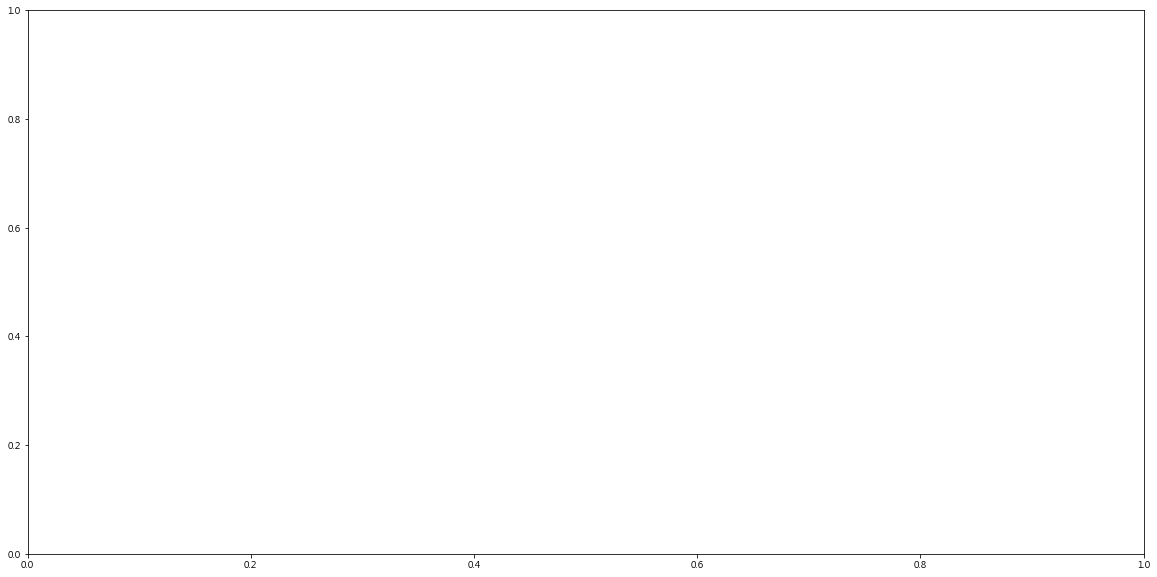

In [372]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

In [331]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:].plot(ax= axes)

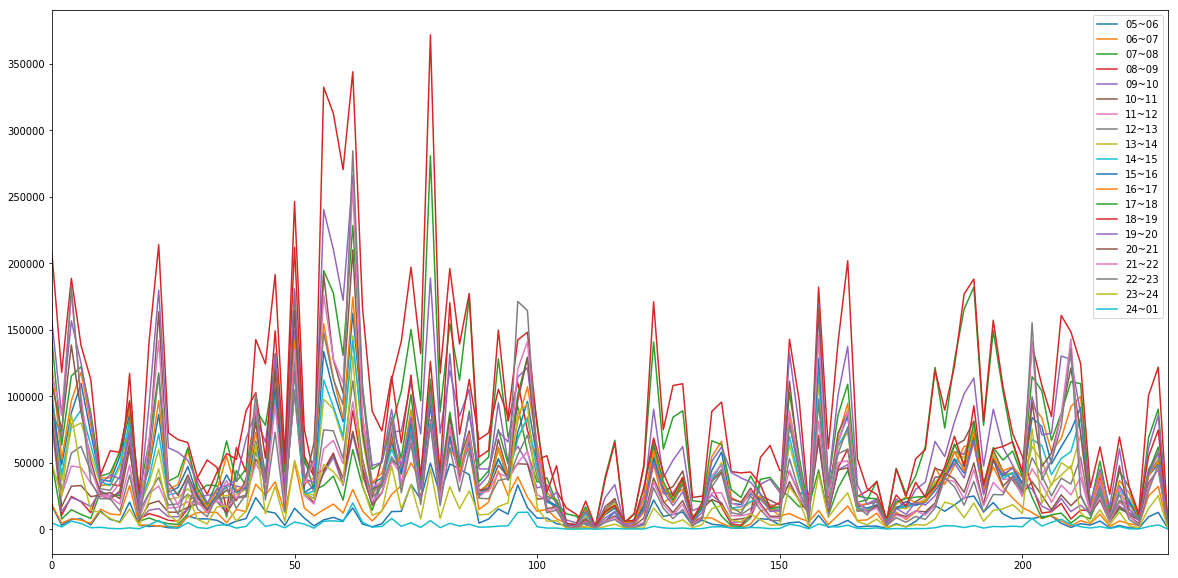

In [332]:
fig

In [388]:
# subTop10.set_index('전체')
subTop10.set_index('전체').iloc[:,1]

전체
강 남       2910770
잠 실       2491504
신 림       2317361
삼 성       2153134
강 변       1958187
고속터미      1919591
선 릉       1893532
서울역(1)    1830134
구로공단      1730707
신 촌       1710438
Name: 합, dtype: int64

In [395]:
subTop10.전체

62        강 남
50        잠 실
78        신 림
56        삼 성
46        강 변
158      고속터미
58        선 릉
0      서울역(1)
82       구로공단
98        신 촌
Name: 전체, dtype: object

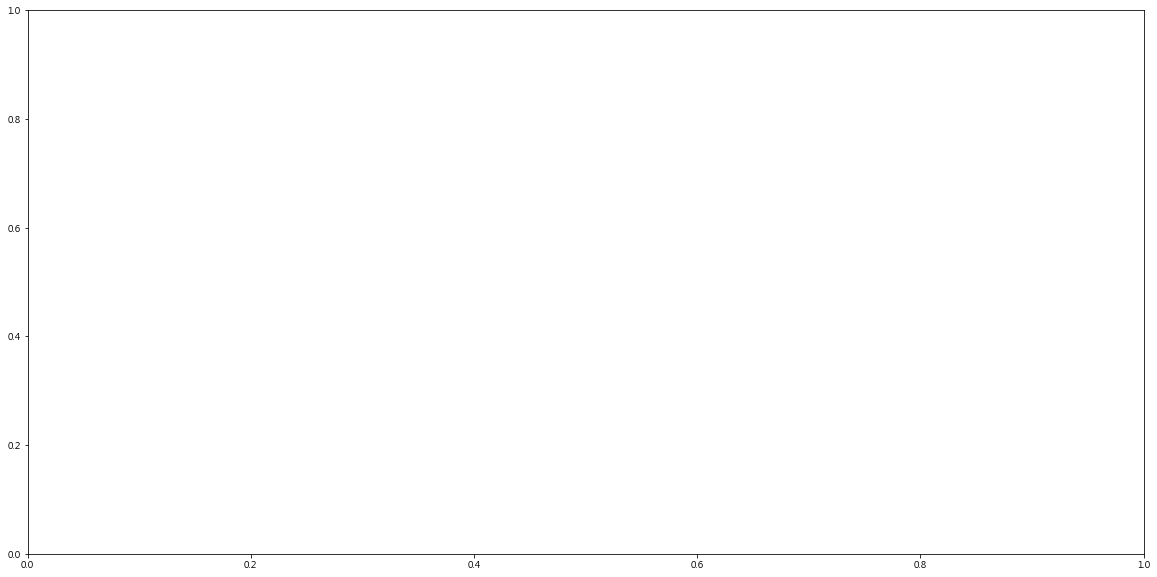

In [391]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

#### 이건 top10 역 승차수 비교 plot이고

In [392]:
subTop10.set_index('전체').iloc[:,1].plot(ax=axes)

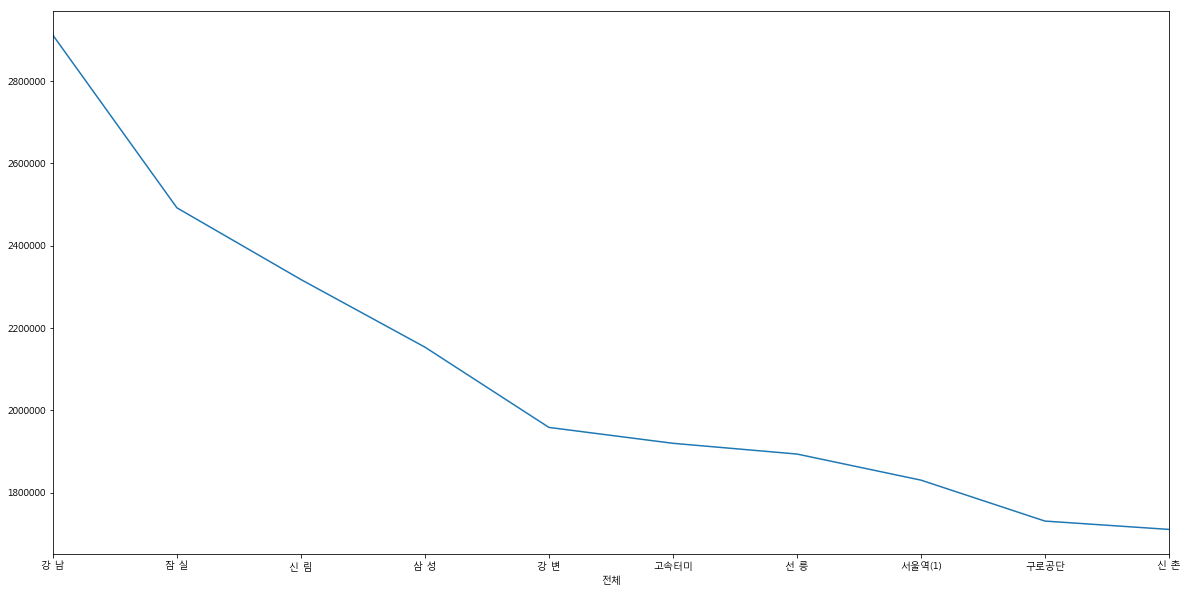

In [393]:
fig

In [362]:
subwayy_si.idxmax()

05~06    (신 림, 승차)
06~07    (신 림, 승차)
07~08    (신 림, 승차)
08~09    (역 삼, 하차)
09~10    (강 남, 하차)
10~11    (강 남, 하차)
11~12    (강 남, 하차)
12~13    (강 남, 하차)
13~14    (강 남, 하차)
14~15    (강 남, 하차)
15~16    (강 남, 승차)
16~17    (강 남, 승차)
17~18    (강 남, 승차)
18~19    (강 남, 승차)
19~20    (신 림, 하차)
20~21    (강 남, 승차)
21~22    (강 남, 승차)
22~23    (강 남, 승차)
23~24    (신 림, 하차)
24~01    (신도림, 하차)
dtype: object

In [367]:
subwayy.rank(ascending=False)['전체'].sort_values()

212      1.5
213      1.5
130      3.5
131      3.5
96       5.5
97       5.5
202      7.5
203      7.5
94       9.5
95       9.5
37      11.5
36      11.5
201     13.5
200     13.5
173     15.5
172     15.5
104     17.5
105     17.5
209     19.5
208     19.5
227     21.5
226     21.5
17      23.5
16      23.5
187     25.5
186     25.5
121     27.5
120     27.5
55      29.5
54      29.5
       ...  
231    203.5
230    203.5
162    205.5
163    205.5
72     207.5
73     207.5
197    209.5
196    209.5
148    211.5
149    211.5
123    213.5
122    213.5
83     215.5
82     215.5
44     217.5
45     217.5
160    219.5
161    219.5
64     221.5
65     221.5
159    223.5
158    223.5
137    225.5
136    225.5
42     227.5
43     227.5
47     229.5
46     229.5
62     231.5
63     231.5
Name: 전체, Length: 232, dtype: float64

In [343]:
print(subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.shape)
print(subwayy['전체'].unique().shape)

(20, 116)
(116,)


In [344]:
subwayy['전체'].unique()

array(['서울역(1)', '시 청(1)', '종 각', '종로3(1)', '종로5가', '동대문', '신설동(1)', '제기동',
       '청량리', '동묘앞', '시 청(2)', '을지입구', '을지3(2)', '을지4가', '동운(2)', '신당',
       '상왕십리', '왕십리', '한양대', '뚝 섬', '성 수', '건 대', '구 의', '강 변', '성 내',
       '잠 실', '신 천', '종합운동', '삼 성', '선 릉', '역 삼', '강 남', '교대(2)', '서 초',
       '방 배', '사당(2)', '낙성대', '서울대', '봉 천', '신 림', '신대방', '구로공단', '대 림',
       '신도림', '문 래', '영등포구', '당 산', '합 정', '홍 대', '신 촌', '이 대', '아 현',
       '충정로', '용 답', '신 답', '신설동(2)', '도림천', '양천구청', '신정네거', '용두역', '지 축',
       '구파발', '연신내', '불 광', '녹 번', '홍 제', '무악재', '독립문', '경복궁', '안 국',
       '종로3(3)', '을지3(3)', '동 대', '약 수', '금 호', '옥 수', '압구정', '신 사', '잠 원',
       '고속터미', '교대(3)', '남부터미', '양 재', '매 봉', '도 곡', '대 치', '학여울', '대 청',
       '일 원', '수 서', '당고개', '상 계', '노 원', '창 동', '쌍 문', '수 유', '미 아',
       '미아3거', '길 음', '성신여대', '한성대', '혜 화', '동대문(4)', '동운(4)', '충무로',
       '명 동', '회 현', '서울역(4)', '숙 대', '삼각지', '신용산', '이 촌', '동 작', '총신대',
       '사당(4)', '남태령'], dtype=object)

In [360]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:]

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
0    17465  18434   50313   93398   78705   86342   93585   97707  102608   
2     2993   4473    7633   10404   13328   16953   25467   27265   36393   
4     7371   7836   14545   24578   23691   32290   47470   57187   76131   
6     7683   6733   11103   20647   20878   32775   46390   62213   79812   
8     3159   4416    8070   12328   16909   24445   34454   43485   56337   
10   13570  14955   28139   32650   28878   25619   25431   30289   33404   
12    7379  11384   24936   33848   24614   22337   25357   29247   32778   
14    5432  10675   25372   32579   26940   28781   34569   39531   46276   
16   20318  32688   83208  117006   75323   65009   70401   71667   78177   
18    2779   3034    5963    7454    6531    6421    8773   13398   16461   
20    2035   3074    8395   11645   14225   18935   26720   26947   34564   
22    2466   2358    5710    9584   15440   21197   32455   39058   59700   
24    1029   2127    4082    6641    9357   12763   15863   18037   22419   
26     896   2015    3572    5919    9319   12726   16408   19145   23808   
28    9832   9164   11435   15277   15174   16376   20760   26390   30351   
30    7779  12349   27981   38776   24809   19077   19234   20296   22763   
32    7678  12812   33152   52000   25284   19538   15801   16150   17179   
34    6645  12502   32645   46430   27202   20939   21252   22619   25507   
36    2840   4759    9090   14074   11163   12323   16572   23712   25071   
38    6004  14839   44040   61312   32417   23647   23406   23716   25969   
40    7932  13101   32654   43004   30593   25461   24257   24325   29969   
42   23676  33777   90295  142493   84181   52568   49475   57892   64044   
44   13507  25483   78043  124220   65175   39937   35954   35905   38312   
46   12065  35656  123895  191360  121986  102537  104340  101414  101597   
48    2744  12433   43439   54991   30194   24113   24393   24233   24548   
50   15702  49582  178192  246272  149538  103022  102144  104737  118859   
52    8315  15970   53762   74997   39939   27401   25531   26776   27506   
54    2496  10029   29197   40776   28634   19940   18861   23068   25401   
56    6961  14629   32889   44500   41747   43256   60301   74698   97641   
58    8814  18853   39883   57160   54053   56357   66754   73898   90448   
..     ...    ...     ...     ...     ...     ...     ...     ...     ...   
172    637   1566    4940    5654    4010    3171    3949    3989    4316   
174   4103  12779   45668   45249   22697   16695   15566   15637   15742   
176   1620   7219   26588   24139   16347   15526   18132   17799   15501   
178   5811  12974   39904   52851   29876   20711   19175   18658   19452   
180  12235  21466   62352   59794   35329   25085   21564   22482   22183   
182  17690  46606  121559  119570   65932   45674   39290   38825   35693   
184  13462  33670   75915   89521   54574   43398   39248   40293   41734   
186  18142  47864  126855  122709   80669   62738   58202   58275   57431   
188  23608  62191  165423  176839  101813   66952   56694   56052   53626   
190  24880  63740  181985  188023  113610   81333   74354   74171   75024   
192  12994  27378   78046   80872   47287   32629   30567   31127   33110   
194  19977  46842  149182  157048   90141   59326   52971   54524   57155   
196  11443  31624  103519  106975   61441   43565   37317   40078   40972   
198   7795  23379   64218   71858   48151   36722   38152   41672   42420   
200   8452  16296   42442   54506   34585   26696   26441   28586   31143   
202   8005  12474   23966   32789   30078   35675   45545   53687   62295   
204   9310   7986    8221   12079   17372   25519   33745   40287   50976   
206   9842  10165   10808   13114   13620   14582   20168   24960   32868   
208   4315   6134   12046   19378   23025   25805   33119   38350   49987   
210   1299   2458    4511    7598   13222   17568   25781   33864   45213   
2

In [358]:
print(subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.shape)

(20, 116)


In [493]:
subwayyToff= subwayy[subwayy['구분']=='하차'].iloc[:,2:].T
subwayyToff.columns= subwayy['전체'].unique()
subwayyToff

서울역(1)  시 청(1)     종 각  종로3(1)    종로5가    동대문  신설동(1)    제기동     청량리  \
05~06    7829    4142    4861    2119    2977   3176    1991   2562    5307   
06~07   48553   19730   29757   18872   14274  11703    9248  14188   24967   
07~08  110250   67995   93579   34622   51907  18818   33809  21419   41351   
08~09  233852  175458  245221  103951  127936  41963   77567  53022   72675   
09~10  121983   83777  153933  110831   93821  39519   52622  39372   74262   
10~11   79628   48363   88680   95839   67136  38817   33818  44734   74185   
11~12   75577   47519   83402   93370   63338  42117   29901  47875   72502   
12~13   70984   42646   78253   97363   61557  45097   31321  53633   77895   
13~14   80388   45465   84694  106736   63166  45292   33285  58264   86168   
14~15   80263   42882   80095  106276   59980  45933   29796  57698   89817   
15~16   79592   38720   71320   91369   52270  44102   28097  50276   87378   
16~17   84211   36738   75733   77952   44883  40836   27573  44119   85742   
17~18   91308   37284   91056   72634   39772  38522   28361  37284   87603   
18~19   98175   45942  121063   84674   39299  41910   32842  35514  101939   
19~20   81918   43780  106523   77413   27538  40636   28189  29430   92060   
20~21   65388   25171   49591   35839   13731  34080   19594  17615   65208   
21~22   59285   14515   27783   18949   10187  28885   17165  14610   59219   
22~23   50266    8552   18249   12579    8500  25567   17326  14643   58019   
23~24   32182    5349   10439    8339    5253  16863   12012   9957   38778   
24~01   13943    1603    2429    4016    1550   5837    2975   2285   11914   

         동묘앞  ...      회 현  서울역(4)    숙 대    삼각지    신용산    이 촌    동 작    총신대  \
05~06    430  ...     1663     905   1255    731   1152    853    312   1094   
06~07   3736  ...    25894   14106  11777   6472  10714  12039   4335  13095   
07~08   9412  ...    57322   28385  35835  16253  31395  19887   6686  26021   
08~09  34058  ...   161902   59567  88771  35249  93774  35168  14867  60284   
09~10  21584  ...   135213   35804  48736  15359  69207  29996   8561  46592   
10~11  14559  ...    85434   24805  36972  12181  36708  17299   5199  29603   
11~12  14944  ...    92971   24133  28704  12360  29829  16819   4965  30051   
12~13  18318  ...    86007   24750  29820  12624  30191  17471   6796  34508   
13~14  21588  ...    79917   29806  28606  11782  32468  20563   7016  37539   
14~15  21286  ...    77667   30316  27221  10715  31154  20350   6733  40670   
15~16  18977  ...    67836   33075  25410  11082  31310  17125   6517  46848   
16~17  16956  ...    50481   34791  27605  10438  30559  15319   7600  54374   
17~18  14506  ...    39909   38526  32674  11383  30999  14705   8662  67594   
18~19  13029  ...    32562   40490  41242  13765  37248  18205   9223  95743   
19~20   9488  ...    22565   34284  38340  12524  29311  16681   8135  93400   
20~21   6428  ...    11422   25919  25402   7239  17819  10484   5858  63246   
21~22   5465  ...     9238   23424  22970   6605  14554   9030   5007  56352   
22~23   5243  ...    10191   18570  23585   6575  13135   8895   4509  57793   
23~24   4700  ...     8053   10414  16262   4257   8053   5719   3109  37546   
24~01   2800  ...     2305    5180   3661   1385   2054   1897    964  10558   

       사당(4)   남태령  
05~06   2435    77  
06~07  20684  1384  
07~08  39923  3142  
08~09  62770  6474  
09~10  49210  2042  
10~11  34835  1529  
11~12  31742  1361  
12~13  31163  1471  
13~14  32002  1522  
14~15  31037  1413  
15~16  32944  1421  
16~17  39538  2067  
17~18  50574  1857  
18~19  72471  2344  
19~20  69209  2171  
20~21  46874  1374  
21~22  45369  1460  
22~23  47597  1515  
23~24  34915  1014  
24~01  16260   387  

[20 rows x 116 columns]

In [346]:
subwayyT= subwayy[subwayy['구분']=='승차'].iloc[:,2:].T

In [347]:
subwayyT.columns= subwayy['전체'].unique()

In [348]:
subwayyT

서울역(1)  시 청(1)     종 각  종로3(1)    종로5가    동대문  신설동(1)    제기동     청량리  \
05~06   17465    2993    7371    7683    3159  13570    7379   5432   20318   
06~07   18434    4473    7836    6733    4416  14955   11384  10675   32688   
07~08   50313    7633   14545   11103    8070  28139   24936  25372   83208   
08~09   93398   10404   24578   20647   12328  32650   33848  32579  117006   
09~10   78705   13328   23691   20878   16909  28878   24614  26940   75323   
10~11   86342   16953   32290   32775   24445  25619   22337  28781   65009   
11~12   93585   25467   47470   46390   34454  25431   25357  34569   70401   
12~13   97707   27265   57187   62213   43485  30289   29247  39531   71667   
13~14  102608   36393   76131   79812   56337  33404   32778  46276   78177   
14~15  101710   41128   78721   89760   63083  35811   32837  49218   79725   
15~16   93849   48352   87480  109496   72147  37221   35917  54800   87285   
16~17  122597   52182   96491  117960   78378  38553   38590  60054   90482   
17~18  142272   63118  115106  122073   87662  39791   42281  57702   95386   
18~19  207172  117857  188578  138037  112569  40490   58866  57808   96655   
19~20  156209   85833  156569  124621   83818  33662   40858  37894   73080   
20~21  108909   74034  138406   87746   51502  26227   27493  22871   60459   
21~22  116350   85680  176800   99388   46205  24449   24016  18794   48159   
22~23   88902   69327  182774   93874   35584  22797   22953  13575   40716   
23~24   49049   24653   86306   43373   14442  12488    8107   4752   14929   
24~01    4558    1691    6074    4284    1047   1378     558    301     963   

         동묘앞  ...      회 현  서울역(4)    숙 대    삼각지    신용산    이 촌    동 작     총신대  \
05~06   2779  ...     4074    3044   6120    842   2722    959    705    9235   
06~07   3034  ...     6357    4219  11212   2094   6150   4080   2780   25112   
07~08   5963  ...    10229    7803  27701   5724  15073  12302   7718   68737   
08~09   7454  ...    14269   13936  39447   8746  20559  19053  12209  100562   
09~10   6531  ...    18009   11492  26357   6646  17534  12055   9002   60950   
10~11   6421  ...    24895   11342  21873   5414  16679  10731   6824   44741   
11~12   8773  ...    38682   12434  24197   5875  20083  14924   8462   41607   
12~13  13398  ...    54125   12329  26399   7871  21518  18583   7846   42023   
13~14  16461  ...    70701   13101  31520   9804  26257  19485   6957   43037   
14~15  17350  ...    83892   12113  29929   9216  28455  22668   7141   40587   
15~16  22413  ...    91576   12240  35299   9014  32631  20621   8091   40130   
16~17  26155  ...    99819   14854  41626   9462  36517  27182   7837   40140   
17~18  26026  ...   109352   17898  51082  13034  43461  31493   8755   43223   
18~19  26744  ...   124486   31208  61796  26184  69311  31985  11264   54705   
19~20  17938  ...    87128   19813  44994  16854  60385  15026   6692   41809   
20~21  10419  ...    72045   13839  32937   9876  47613   9692   4356   34741   
21~22   7783  ...    42944   13450  35465   8854  31603   9762   3143   31918   
22~23   6456  ...    25860   10108  31804   7903  26170   7228   2520   28482   
23~24   2630  ...    12495    5027  14531   3294  12792   2473   1038   15424   
24~01    313  ...     1823     858   1885    492   1921    253    160    1930   

        사당(4)   남태령  
05~06   12640   388  
06~07   32077   878  
07~08   90179  2127  
08~09  121773  2921  
09~10   85433  2280  
10~11   57495  2116  
11~12   52123  1928  
12~13   52127  1941  
13~14   55586  2078  
14~15   51215  1843  
15~16   48829  2472  
16~17   51416  3448  
17~18   61714  3125  
18~19   74536  3190  
19~20   58021  2014  
20~21   44821  1046  
21~22   45749   806  
22~23   48776   539  
23~24   25147   227  
24~01    3197    51  

[20 rows x 116 columns]

In [354]:
plt.rc('font', family='Malgun Gothic')

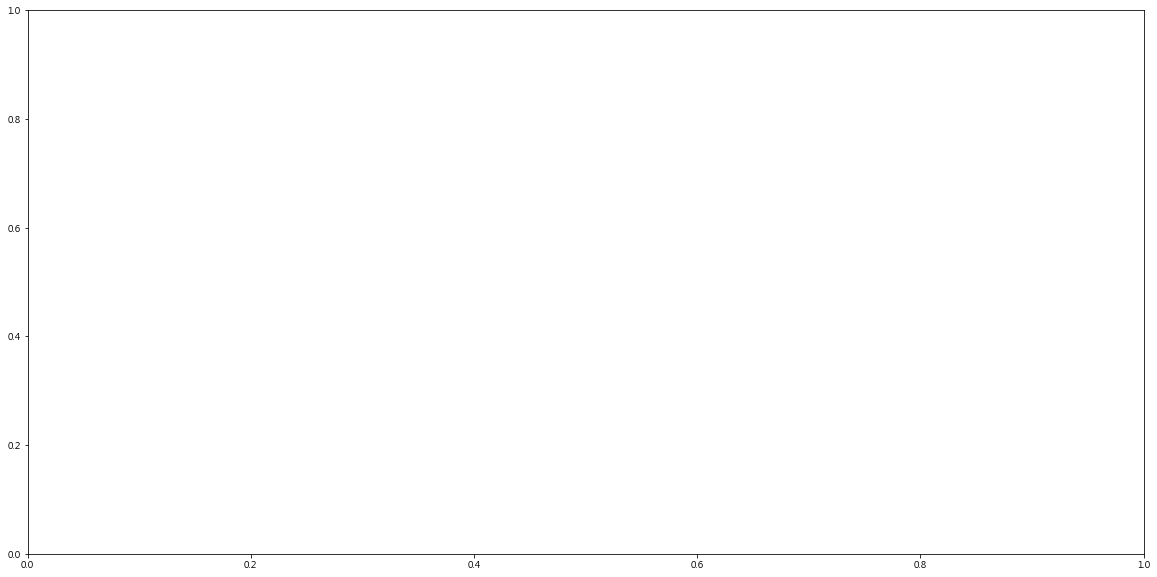

In [502]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

In [503]:
# subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.plot(ax= axes)
subwayyT.plot(ax=axes)

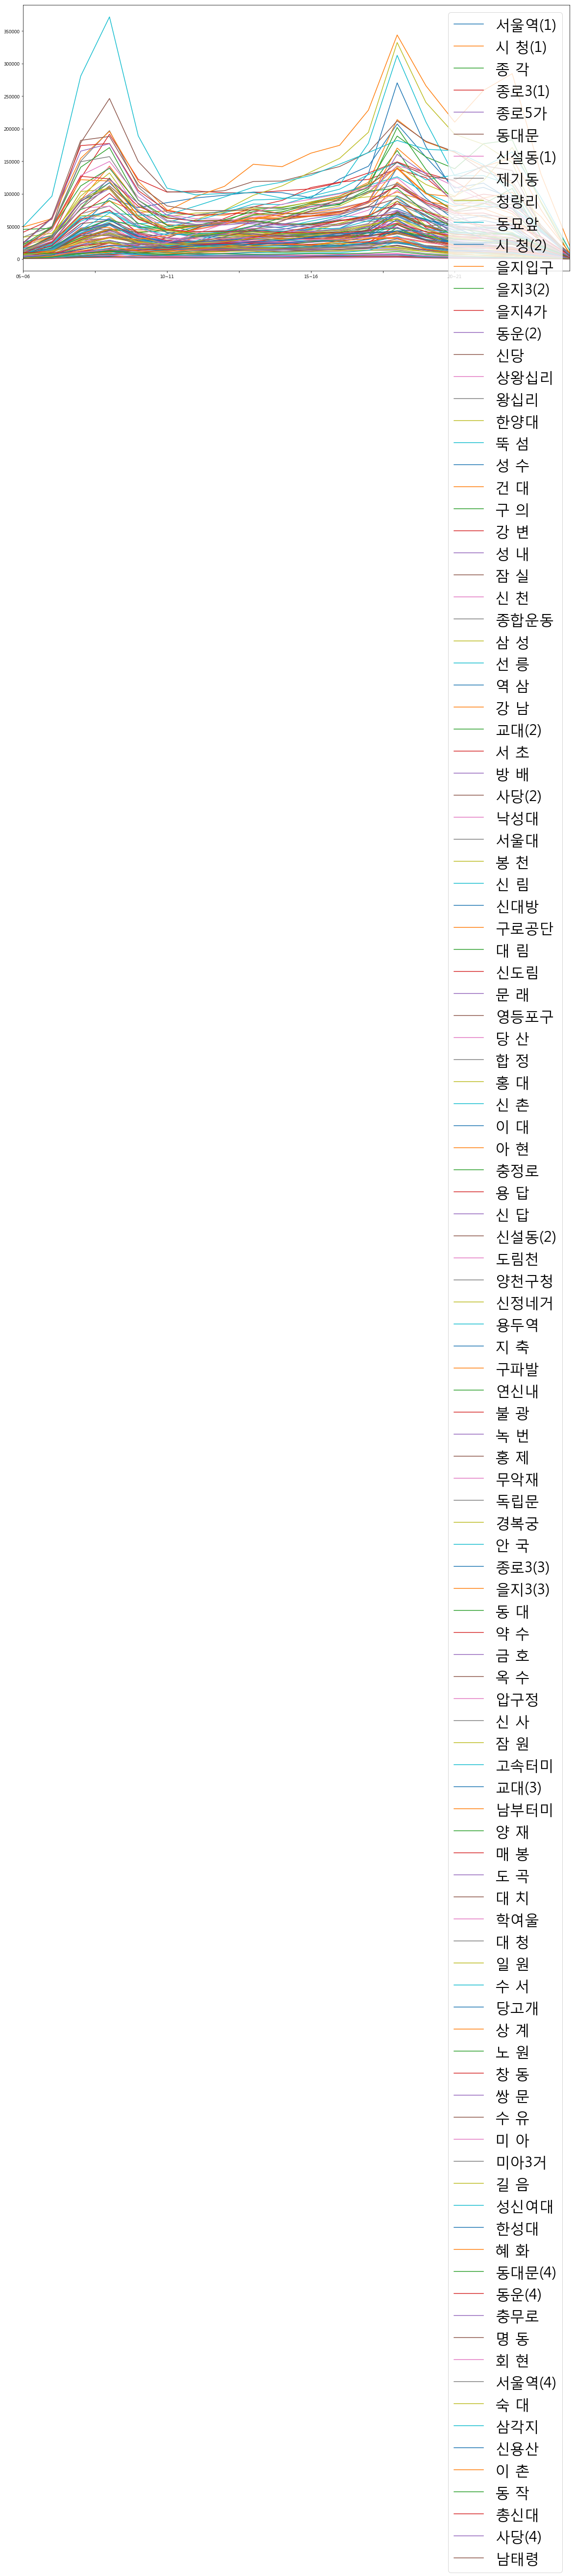

In [504]:
fig

#### 전체 다 말고 top10역만;;

In [402]:
from pandas import Series

In [405]:
top10sta= list(subTop10.전체)
top10sta

['강 남', '잠 실', '신 림', '삼 성', '강 변', '고속터미', '선 릉', '서울역(1)', '구로공단', '신 촌']

In [414]:
subwayyT[top10sta]

강 남     잠 실     신 림     삼 성     강 변    고속터미     선 릉  서울역(1)    구로공단  \
05~06   15916   15702   49677    6961   12065   10312    8814   17465   48983   
06~07   29785   49582   96328   14629   35656   14066   18853   18434   61671   
07~08   59817  178192  280681   32889  123895   44545   39883   50313  154415   
08~09   88993  246272  371548   44500  191360   70532   57160   93398  195869   
09~10   71391  149538  188839   41747  121986   67071   54053   78705  119292   
10~11   73463  103022  108599   43256  102537   67651   56357   86342   75166   
11~12   95645  102144   98333   60301  104340   81048   66754   93585   67041   
12~13  111468  104737  100468   74698  101414   95133   73898   97707   67104   
13~14  145307  118859  101874   97641  101597  110046   90448  102608   76240   
14~15  141569  119566   93288  112105  104580  117845   91931  101710   69687   
15~16  162306  130692   93115  133485  107455  128237  103986   93849   69908   
16~17  174384  141830  100842  154412  116962  145443  113798  122597   76528   
17~18  228344  163520  112757  194358  131927  163204  177476  142272   87879   
18~19  343805  211909  126115  332211  149012  181956  312520  207172  170151   
19~20  265809  180570  101544  240173  132074  168320  210222  156209  131854   
20~21  209983  164374   82068  191407  119169  166066  127400  108909   84367   
21~22  258682  134507   80750  175971   93252  144745  127908  116350   77307   
22~23  284400  119293   78866  147775   72860   97829  112611   88902   61009   
23~24  130027   51803   45249   48656   32315   41675   43210   49049   31858   
24~01   19676    5392    6420    5959    3731    3867    6250    4558    4378   

          신 촌  
05~06   16080  
06~07   24059  
07~08   57826  
08~09   74313  
09~10   49514  
10~11   48844  
11~12   58666  
12~13   70790  
13~14   84257  
14~15   83375  
15~16   96050  
16~17  107020  
17~18  129415  
18~19  148010  
19~20  121326  
20~21  128816  
21~22  141022  
22~23  164281  
23~24   94013  
24~01   12761

In [487]:
plt.rc('font', family='Malgun Gothic')
plt.rc('legend', fontsize=30)

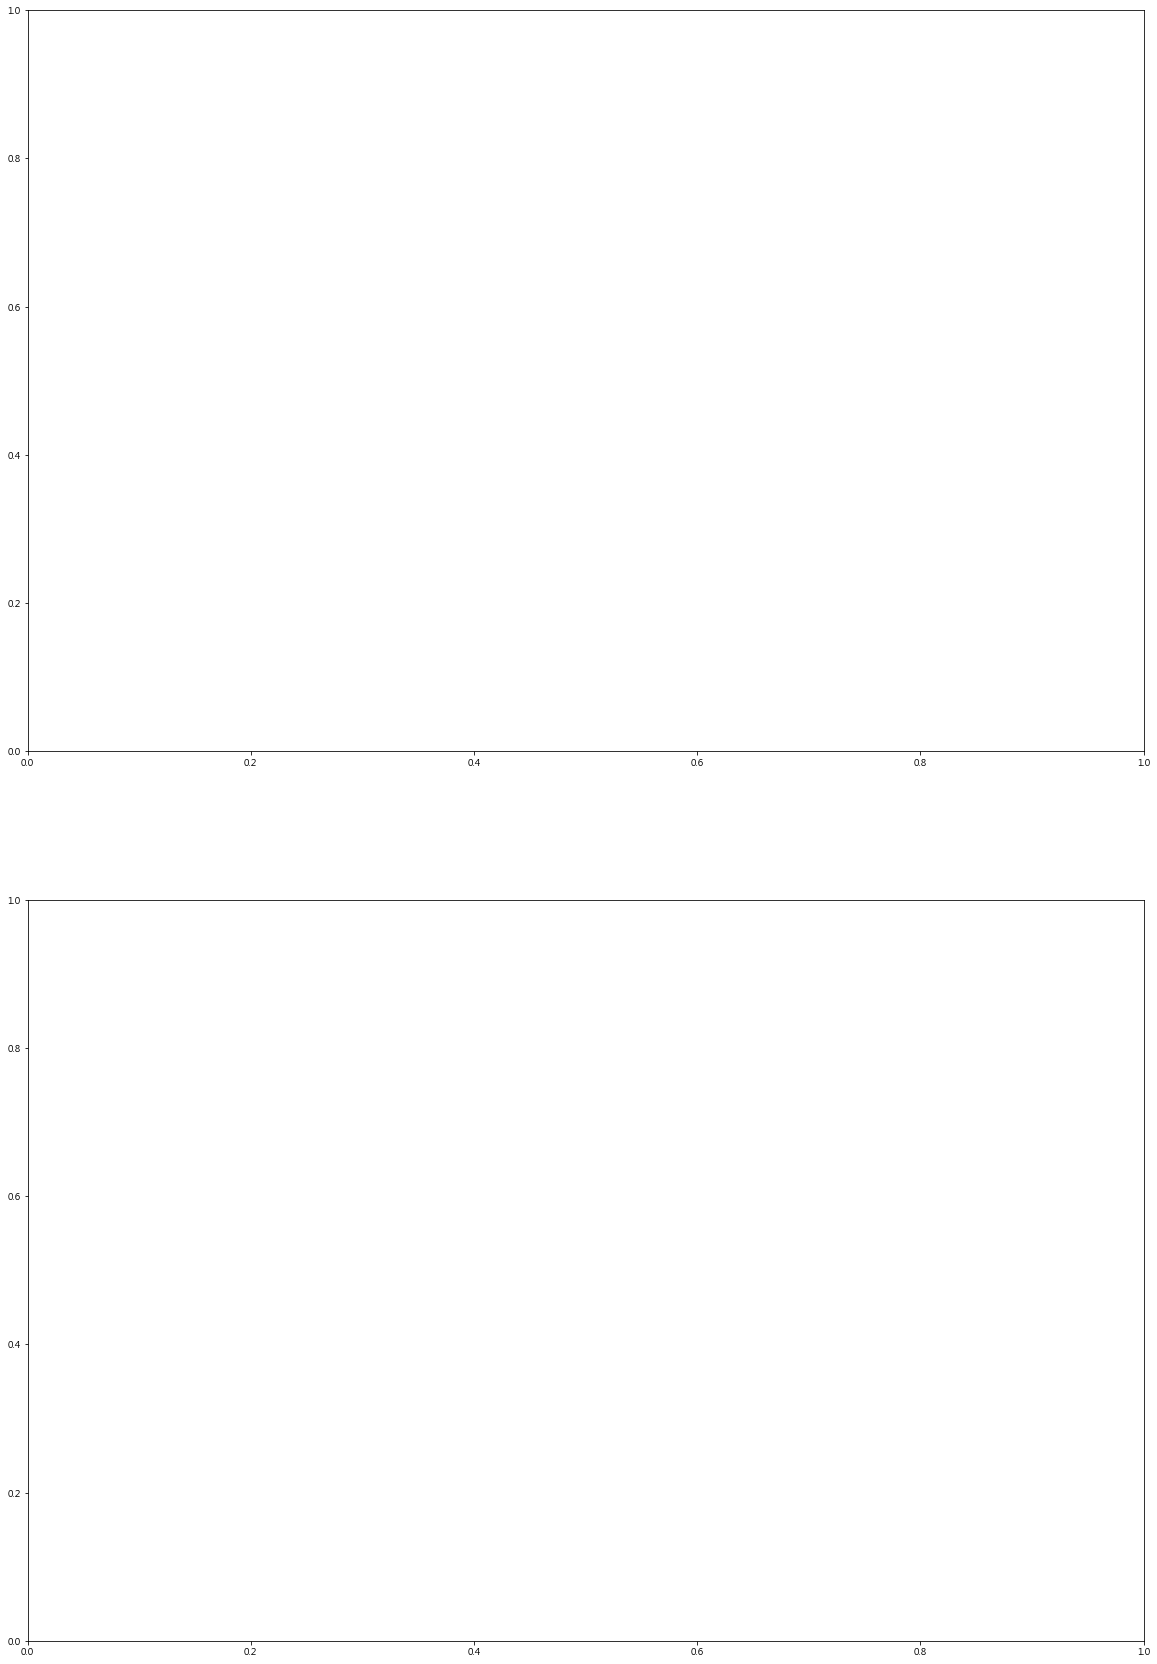

In [511]:
fig.clear('all')
fig, axes= plt.subplots(2,1)
fig.set_size_inches(20,30)

In [512]:
subwayyT[top10sta].plot(ax=axes[0], title='승차Top10')
subwayyToff[top10sta].plot(ax=axes[1], title='하차Top10')

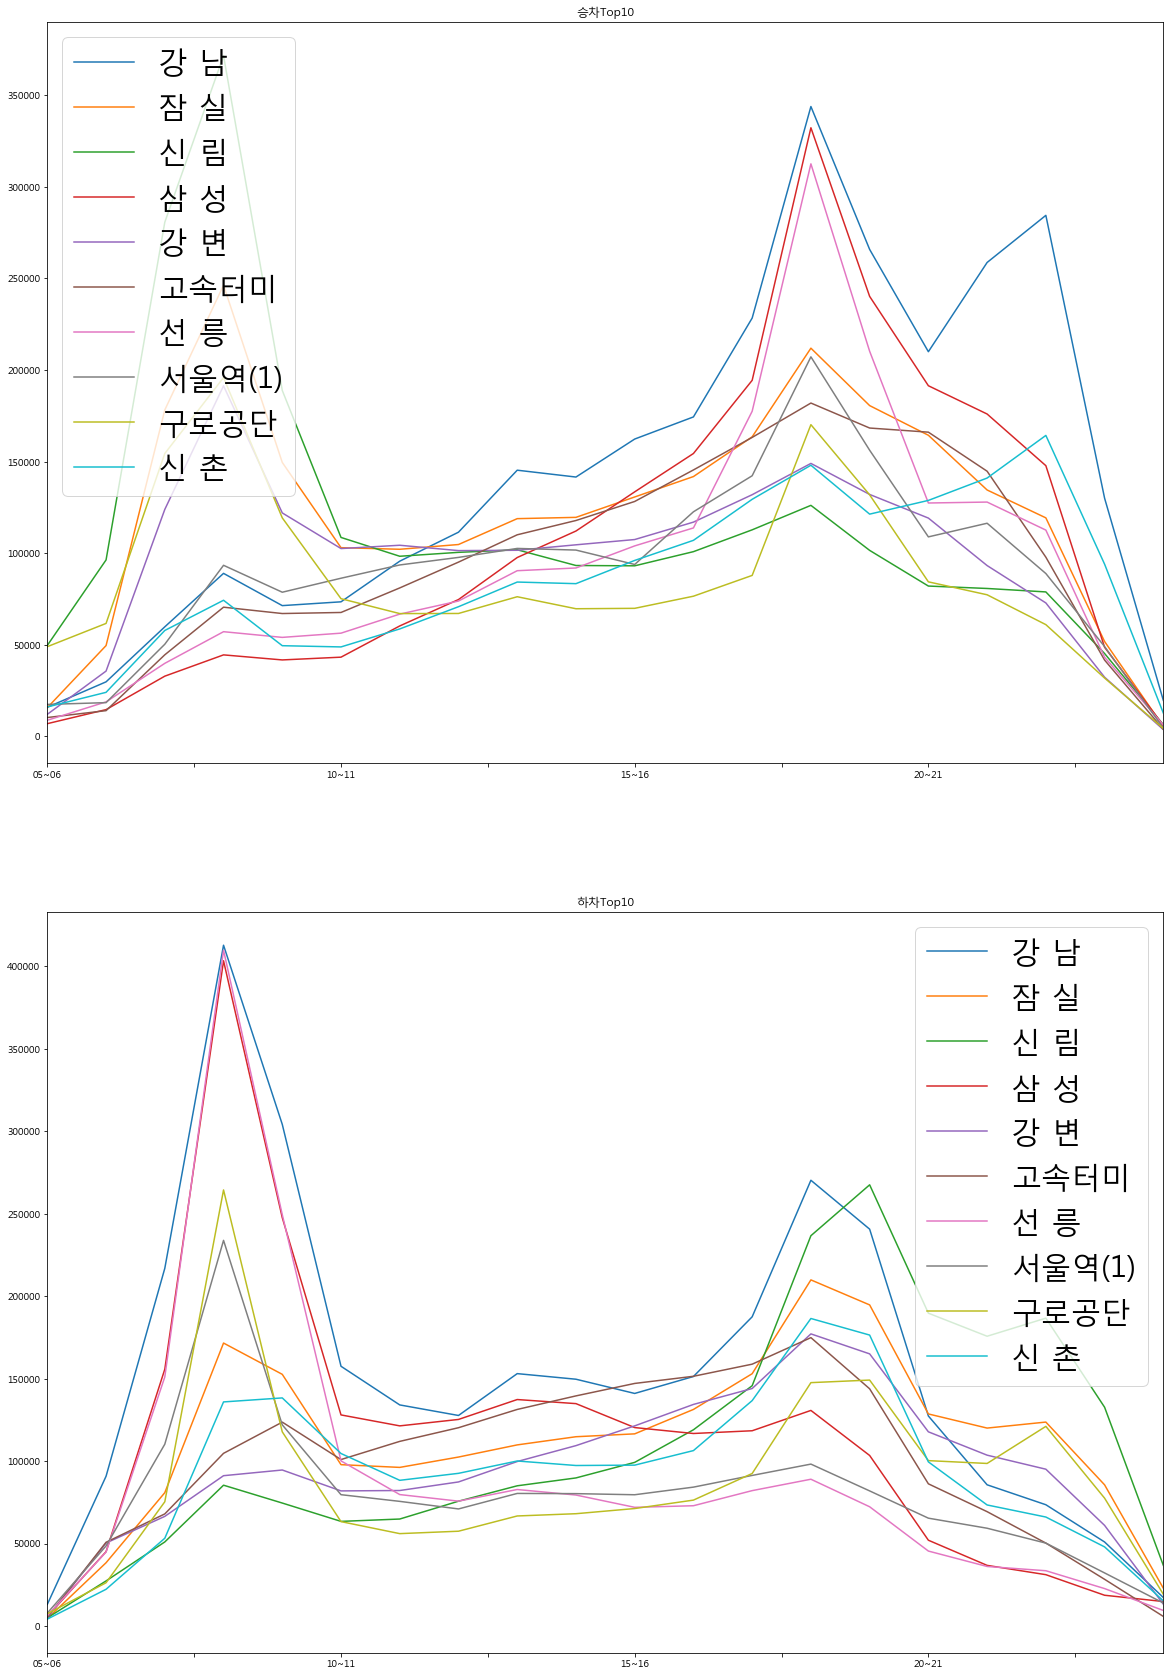

In [513]:
fig

### 5

In [420]:
subwayyT

서울역(1)  시 청(1)     종 각  종로3(1)    종로5가    동대문  신설동(1)    제기동     청량리  \
05~06   17465    2993    7371    7683    3159  13570    7379   5432   20318   
06~07   18434    4473    7836    6733    4416  14955   11384  10675   32688   
07~08   50313    7633   14545   11103    8070  28139   24936  25372   83208   
08~09   93398   10404   24578   20647   12328  32650   33848  32579  117006   
09~10   78705   13328   23691   20878   16909  28878   24614  26940   75323   
10~11   86342   16953   32290   32775   24445  25619   22337  28781   65009   
11~12   93585   25467   47470   46390   34454  25431   25357  34569   70401   
12~13   97707   27265   57187   62213   43485  30289   29247  39531   71667   
13~14  102608   36393   76131   79812   56337  33404   32778  46276   78177   
14~15  101710   41128   78721   89760   63083  35811   32837  49218   79725   
15~16   93849   48352   87480  109496   72147  37221   35917  54800   87285   
16~17  122597   52182   96491  117960   78378  38553   38590  60054   90482   
17~18  142272   63118  115106  122073   87662  39791   42281  57702   95386   
18~19  207172  117857  188578  138037  112569  40490   58866  57808   96655   
19~20  156209   85833  156569  124621   83818  33662   40858  37894   73080   
20~21  108909   74034  138406   87746   51502  26227   27493  22871   60459   
21~22  116350   85680  176800   99388   46205  24449   24016  18794   48159   
22~23   88902   69327  182774   93874   35584  22797   22953  13575   40716   
23~24   49049   24653   86306   43373   14442  12488    8107   4752   14929   
24~01    4558    1691    6074    4284    1047   1378     558    301     963   

         동묘앞  ...      회 현  서울역(4)    숙 대    삼각지    신용산    이 촌    동 작     총신대  \
05~06   2779  ...     4074    3044   6120    842   2722    959    705    9235   
06~07   3034  ...     6357    4219  11212   2094   6150   4080   2780   25112   
07~08   5963  ...    10229    7803  27701   5724  15073  12302   7718   68737   
08~09   7454  ...    14269   13936  39447   8746  20559  19053  12209  100562   
09~10   6531  ...    18009   11492  26357   6646  17534  12055   9002   60950   
10~11   6421  ...    24895   11342  21873   5414  16679  10731   6824   44741   
11~12   8773  ...    38682   12434  24197   5875  20083  14924   8462   41607   
12~13  13398  ...    54125   12329  26399   7871  21518  18583   7846   42023   
13~14  16461  ...    70701   13101  31520   9804  26257  19485   6957   43037   
14~15  17350  ...    83892   12113  29929   9216  28455  22668   7141   40587   
15~16  22413  ...    91576   12240  35299   9014  32631  20621   8091   40130   
16~17  26155  ...    99819   14854  41626   9462  36517  27182   7837   40140   
17~18  26026  ...   109352   17898  51082  13034  43461  31493   8755   43223   
18~19  26744  ...   124486   31208  61796  26184  69311  31985  11264   54705   
19~20  17938  ...    87128   19813  44994  16854  60385  15026   6692   41809   
20~21  10419  ...    72045   13839  32937   9876  47613   9692   4356   34741   
21~22   7783  ...    42944   13450  35465   8854  31603   9762   3143   31918   
22~23   6456  ...    25860   10108  31804   7903  26170   7228   2520   28482   
23~24   2630  ...    12495    5027  14531   3294  12792   2473   1038   15424   
24~01    313  ...     1823     858   1885    492   1921    253    160    1930   

        사당(4)   남태령  
05~06   12640   388  
06~07   32077   878  
07~08   90179  2127  
08~09  121773  2921  
09~10   85433  2280  
10~11   57495  2116  
11~12   52123  1928  
12~13   52127  1941  
13~14   55586  2078  
14~15   51215  1843  
15~16   48829  2472  
16~17   51416  3448  
17~18   61714  3125  
18~19   74536  3190  
19~20   58021  2014  
20~21   44821  1046  
21~22   45749   806  
22~23   48776   539  
23~24   25147   227  
24~01    3197    51  

[20 rows x 116 columns]

In [424]:
subwayyT.xs('05~06')

서울역(1)    17465
시 청(1)     2993
종 각        7371
종로3(1)     7683
종로5가       3159
동대문       13570
신설동(1)     7379
제기동        5432
청량리       20318
동묘앞        2779
시 청(2)     2035
을지입구       2466
을지3(2)     1029
을지4가        896
동운(2)      9832
신당         7779
상왕십리       7678
왕십리        6645
한양대        2840
뚝 섬        6004
성 수        7932
건 대       23676
구 의       13507
강 변       12065
성 내        2744
잠 실       15702
신 천        8315
종합운동       2496
삼 성        6961
선 릉        8814
          ...  
학여울         637
대 청        4103
일 원        1620
수 서        5811
당고개       12235
상 계       17690
노 원       13462
창 동       18142
쌍 문       23608
수 유       24880
미 아       12994
미아3거      19977
길 음       11443
성신여대       7795
한성대        8452
혜 화        8005
동대문(4)     9310
동운(4)      9842
충무로        4315
명 동        1299
회 현        4074
서울역(4)     3044
숙 대        6120
삼각지         842
신용산        2722
이 촌         959
동 작         705
총신대        9235
사당(4)     12640
남태령         388
Name: 05~06, Length: 116

In [425]:
subwayyT.xs('24~01')

서울역(1)    4558
시 청(1)    1691
종 각       6074
종로3(1)    4284
종로5가      1047
동대문       1378
신설동(1)     558
제기동        301
청량리        963
동묘앞        313
시 청(2)    3157
을지입구      6498
을지3(2)    1899
을지4가       857
동운(2)     4897
신당        1142
상왕십리       517
왕십리       2850
한양대       3371
뚝 섬        795
성 수       2034
건 대       9590
구 의       1950
강 변       3731
성 내       1026
잠 실       5392
신 천       3794
종합운동       749
삼 성       5959
선 릉       6250
          ... 
학여울        138
대 청        461
일 원        306
수 서        424
당고개        448
상 계       1037
노 원       2584
창 동       2362
쌍 문       1185
수 유       2634
미 아        805
미아3거      1998
길 음       1775
성신여대      2200
한성대       1788
혜 화       8099
동대문(4)    2278
동운(4)     5154
충무로       7417
명 동       3636
회 현       1823
서울역(4)     858
숙 대       1885
삼각지        492
신용산       1921
이 촌        253
동 작        160
총신대       1930
사당(4)     3197
남태령         51
Name: 24~01, Length: 116, dtype: int64

### 강사님 코드

In [553]:
!start .

In [568]:
a = pd.ExcelFile('data/subway2.xlsx', encoding='cp949')
raw= a.parse(a.sheet_names[0], skiprows=1)
raw.head(4)

전체  구분  05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13  \
0  서울역(1)  승차  17465  18434   50313   93398   78705  86342  93585  97707   
1     NaN  하차   7829  48553  110250  233852  121983  79628  75577  70984   
2  시 청(1)  승차   2993   4473    7633   10404   13328  16953  25467  27265   
3     NaN  하차   4142  19730   67995  175458   83777  48363  47519  42646   

   ...    15~16   16~17   17~18   18~19   19~20   20~21   21~22  22~23  23~24  \
0  ...    93849  122597  142272  207172  156209  108909  116350  88902  49049   
1  ...    79592   84211   91308   98175   81918   65388   59285  50266  32182   
2  ...    48352   52182   63118  117857   85833   74034   85680  69327  24653   
3  ...    38720   36738   37284   45942   43780   25171   14515   8552   5349   

   24~01  
0   4558  
1  13943  
2   1691  
3   1603  

[4 rows x 22 columns]

In [569]:
raw= raw.fillna(method='ffill')
raw.head(4)

전체  구분  05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13  \
0  서울역(1)  승차  17465  18434   50313   93398   78705  86342  93585  97707   
1  서울역(1)  하차   7829  48553  110250  233852  121983  79628  75577  70984   
2  시 청(1)  승차   2993   4473    7633   10404   13328  16953  25467  27265   
3  시 청(1)  하차   4142  19730   67995  175458   83777  48363  47519  42646   

   ...    15~16   16~17   17~18   18~19   19~20   20~21   21~22  22~23  23~24  \
0  ...    93849  122597  142272  207172  156209  108909  116350  88902  49049   
1  ...    79592   84211   91308   98175   81918   65388   59285  50266  32182   
2  ...    48352   52182   63118  117857   85833   74034   85680  69327  24653   
3  ...    38720   36738   37284   45942   43780   25171   14515   8552   5349   

   24~01  
0   4558  
1  13943  
2   1691  
3   1603  

[4 rows x 22 columns]

In [572]:
raw_si= raw.set_index(['전체','구분'])
raw_si.head(4)

05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13   13~14  \
전체     구분                                                                      
서울역(1) 승차  17465  18434   50313   93398   78705  86342  93585  97707  102608   
       하차   7829  48553  110250  233852  121983  79628  75577  70984   80388   
시 청(1) 승차   2993   4473    7633   10404   13328  16953  25467  27265   36393   
       하차   4142  19730   67995  175458   83777  48363  47519  42646   45465   

            14~15  15~16   16~17   17~18   18~19   19~20   20~21   21~22  \
전체     구분                                                                  
서울역(1) 승차  101710  93849  122597  142272  207172  156209  108909  116350   
       하차   80263  79592   84211   91308   98175   81918   65388   59285   
시 청(1) 승차   41128  48352   52182   63118  117857   85833   74034   85680   
       하차   42882  38720   36738   37284   45942   43780   25171   14515   

           22~23  23~24  24~01  
전체     구분                       
서울역(1) 승차  88902  49049   4558  
       하차  50266  32182  13943  
시 청(1) 승차  69327  24653   1691  
       하차   8552   5349   1603

### 1

In [573]:
raw.groupby('구분').agg([sum,'mean'])

05~06                 06~07                  07~08                \
        sum         mean      sum          mean      sum          mean   
구분                                                                       
승차  1091077  9405.836207  2093867  18050.577586  5707011  49198.370690   
하차   247088  2130.068966  1859313  16028.560345  4477554  38599.603448   

       08~09                  09~10                   ...         20~21  \
         sum          mean      sum          mean     ...           sum   
구분                                                    ...                 
승차   7267225  62648.491379  4659800  40170.689655     ...       5289635   
하차  10689617  92151.870690  7271492  62685.275862     ...       4701176   

                    21~22                  22~23                  23~24  \
            mean      sum          mean      sum          mean      sum   
구분                                                                        
승차  45600.301724  5208486  44900.741379  4804469  41417.836207  2214966   
하차  40527.379310  4029799  34739.646552  3977660  34290.172414  2782042   

                   24~01               
            mean     sum         mean  
구분                                     
승차  19094.534483  285451  2460.784483  
하차  23983.120690  919053  7922.870690  

[2 rows x 40 columns]

### 2

In [575]:
raw_si.mean(axis=1)

전체      구분
서울역(1)  승차    91506.70
        하차    78278.75
시 청(1)  승차    40438.20
        하차    41781.55
종 각     승차    80220.20
        하차    75833.05
종로3(1)  승차    65942.30
        하차    62687.15
종로5가    승차    42502.00
        하차    42453.75
동대문     승차    27290.10
        하차    32483.65
신설동(1)  승차    27217.80
        하차    27374.60
제기동     승차    31396.20
        하차    32425.00
청량리     승차    65081.80
        하차    65349.45
동묘앞     승차    11752.05
        하차    12875.35
시 청(2)  승차    39023.55
        하차    43268.20
을지입구    승차    71293.10
        하차    71932.15
을지3(2)  승차    22455.45
        하차    24016.25
을지4가    승차    20561.60
        하차    20988.10
동운(2)   승차    31193.55
        하차    35369.20
                ...   
혜 화     승차    68882.20
        하차    75666.95
동대문(4)  승차    42962.40
        하차    40784.40
동운(4)   승차    36080.50
        하차    36208.85
충무로     승차    53481.50
        하차    56975.65
명 동     승차    60689.95
        하차    66840.80
회 현     승차    49638.05
        하차    52927.60


In [578]:
raw_si.sum(axis=1)

전체      구분
서울역(1)  승차    1830134
        하차    1565575
시 청(1)  승차     808764
        하차     835631
종 각     승차    1604404
        하차    1516661
종로3(1)  승차    1318846
        하차    1253743
종로5가    승차     850040
        하차     849075
동대문     승차     545802
        하차     649673
신설동(1)  승차     544356
        하차     547492
제기동     승차     627924
        하차     648500
청량리     승차    1301636
        하차    1306989
동묘앞     승차     235041
        하차     257507
시 청(2)  승차     780471
        하차     865364
을지입구    승차    1425862
        하차    1438643
을지3(2)  승차     449109
        하차     480325
을지4가    승차     411232
        하차     419762
동운(2)   승차     623871
        하차     707384
               ...   
혜 화     승차    1377644
        하차    1513339
동대문(4)  승차     859248
        하차     815688
동운(4)   승차     721610
        하차     724177
충무로     승차    1069630
        하차    1139513
명 동     승차    1213799
        하차    1336816
회 현     승차     992761
        하차    1058552
서울역(4)  승차     241108
        하차     537250

### 3

In [603]:
data1= raw[raw['구분']=='승차'].iloc[:,2:]
data1
# could not convert string to float: '승차'

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
0    17465  18434   50313   93398   78705   86342   93585   97707  102608   
2     2993   4473    7633   10404   13328   16953   25467   27265   36393   
4     7371   7836   14545   24578   23691   32290   47470   57187   76131   
6     7683   6733   11103   20647   20878   32775   46390   62213   79812   
8     3159   4416    8070   12328   16909   24445   34454   43485   56337   
10   13570  14955   28139   32650   28878   25619   25431   30289   33404   
12    7379  11384   24936   33848   24614   22337   25357   29247   32778   
14    5432  10675   25372   32579   26940   28781   34569   39531   46276   
16   20318  32688   83208  117006   75323   65009   70401   71667   78177   
18    2779   3034    5963    7454    6531    6421    8773   13398   16461   
20    2035   3074    8395   11645   14225   18935   26720   26947   34564   
22    2466   2358    5710    9584   15440   21197   32455   39058   59700   
24    1029   2127    4082    6641    9357   12763   15863   18037   22419   
26     896   2015    3572    5919    9319   12726   16408   19145   23808   
28    9832   9164   11435   15277   15174   16376   20760   26390   30351   
30    7779  12349   27981   38776   24809   19077   19234   20296   22763   
32    7678  12812   33152   52000   25284   19538   15801   16150   17179   
34    6645  12502   32645   46430   27202   20939   21252   22619   25507   
36    2840   4759    9090   14074   11163   12323   16572   23712   25071   
38    6004  14839   44040   61312   32417   23647   23406   23716   25969   
40    7932  13101   32654   43004   30593   25461   24257   24325   29969   
42   23676  33777   90295  142493   84181   52568   49475   57892   64044   
44   13507  25483   78043  124220   65175   39937   35954   35905   38312   
46   12065  35656  123895  191360  121986  102537  104340  101414  101597   
48    2744  12433   43439   54991   30194   24113   24393   24233   24548   
50   15702  49582  178192  246272  149538  103022  102144  104737  118859   
52    8315  15970   53762   74997   39939   27401   25531   26776   27506   
54    2496  10029   29197   40776   28634   19940   18861   23068   25401   
56    6961  14629   32889   44500   41747   43256   60301   74698   97641   
58    8814  18853   39883   57160   54053   56357   66754   73898   90448   
..     ...    ...     ...     ...     ...     ...     ...     ...     ...   
172    637   1566    4940    5654    4010    3171    3949    3989    4316   
174   4103  12779   45668   45249   22697   16695   15566   15637   15742   
176   1620   7219   26588   24139   16347   15526   18132   17799   15501   
178   5811  12974   39904   52851   29876   20711   19175   18658   19452   
180  12235  21466   62352   59794   35329   25085   21564   22482   22183   
182  17690  46606  121559  119570   65932   45674   39290   38825   35693   
184  13462  33670   75915   89521   54574   43398   39248   40293   41734   
186  18142  47864  126855  122709   80669   62738   58202   58275   57431   
188  23608  62191  165423  176839  101813   66952   56694   56052   53626   
190  24880  63740  181985  188023  113610   81333   74354   74171   75024   
192  12994  27378   78046   80872   47287   32629   30567   31127   33110   
194  19977  46842  149182  157048   90141   59326   52971   54524   57155   
196  11443  31624  103519  106975   61441   43565   37317   40078   40972   
198   7795  23379   64218   71858   48151   36722   38152   41672   42420   
200   8452  16296   42442   54506   34585   26696   26441   28586   31143   
202   8005  12474   23966   32789   30078   35675   45545   53687   62295   
204   9310   7986    8221   12079   17372   25519   33745   40287   50976   
206   9842  10165   10808   13114   13620   14582   20168   24960   32868   
208   4315   6134   12046   19378   23025   25805   33119   38350   49987   
210   1299   2458    4511    7598   13222   17568   25781   33864   45213   
2

In [697]:
data_off= raw[raw['구분']=='하차'].set_index('전체').iloc[:,1:]
data_off

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)   7829  48553  110250  233852  121983   79628   75577   70984   80388   
시 청(1)   4142  19730   67995  175458   83777   48363   47519   42646   45465   
종 각      4861  29757   93579  245221  153933   88680   83402   78253   84694   
종로3(1)   2119  18872   34622  103951  110831   95839   93370   97363  106736   
종로5가     2977  14274   51907  127936   93821   67136   63338   61557   63166   
동대문      3176  11703   18818   41963   39519   38817   42117   45097   45292   
신설동(1)   1991   9248   33809   77567   52622   33818   29901   31321   33285   
제기동      2562  14188   21419   53022   39372   44734   47875   53633   58264   
청량리      5307  24967   41351   72675   74262   74185   72502   77895   86168   
동묘앞       430   3736    9412   34058   21584   14559   14944   18318   21588   
시 청(2)   1776  17387   97659  216553   81613   40417   38851   35886   41671   
을지입구     1832  19798   95314  301554  161928   78929   79215   78458   84275   
을지3(2)   1034  11296   39207  116054   64935   35232   27715   22540   25083   
을지4가      961   8790   26713   93562   59011   33157   29525   25108   24848   
동운(2)     933  11717   28801   67006   38118   37690   39403   41140   47159   
신당       1180   8336   17844   46698   31595   21658   21538   22562   24799   
상왕십리      648   5442   10149   39718   19967   14831   12056   12103   12991   
왕십리      1193   8937   14357   32144   19804   14146   14988   16763   19014   
한양대       780   9259   33967   95911   81421   67447   31943   40587   34141   
뚝 섬      1128  10839   26194   80973   35241   19585   19126   21026   23932   
성 수      2755  23224   53112  179607   58020   26743   26673   23749   23823   
건 대      2387  26365   37209   89681   62500   53102   50020   60886   68047   
구 의      1502  10769   19257   58271   38463   27512   27053   29597   32594   
강 변      4913  50331   66473   91145   94599   81923   82156   87351   99733   
성 내      2023  31286   29473   42351   25494   21692   19775   21602   23090   
잠 실      4488  38364   80853  171584  152610   97828   96179  102451  109821   
신 천      1407  31312   24589   31093   28892   20563   20556   21979   24670   
종합운동     1209  14939   33693   51084   32309   25489   21902   27437   26599   
삼 성      5791  45066  155708  403418  247617  127998  121357  125256  137327   
선 릉      6255  44841  151023  409782  249406  100117   79700   75711   82766   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       158   1613    3300    7418    6350    4956    4630    4880    5467   
대 청       832   6309   15424   26638   13011    9247    9402   10595   11213   
일 원       833  10185   18704   23075   18504   18143   14644   16150   18595   
수 서       352   7298   15603   34937   19503   12949   12961   13357   14519   
당고개        77   8138   11942   21618   18217   18387   15276   15719   16662   
상 계       198  11404   23413   25677   22516   20748   20186   24123   26766   
노 원       667  10015   22426   33692   43923   29215   28759   34561   39858   
창 동      4054  15234   31688   58667   47948   43803   43171   49859   52824   
쌍 문      1247  11647   20839   32417   25370   24432   25871   30053   35003   
수 유      2817  17952   29060   92897   63247   55060   53266   56269   59236   
미 아      1473   8778   18667   32350   23283   20408   21702   24911   27742   
미아3거     2703  13622   24264   43556   47638   32995   37454   41611   46666   
길 음      3474  17873   26713   67012   47575   42498   39088   34641   38795   
성신여대     1402   9749   24954   71209   45001   35482   40912   33416   33257   
한성대      1302  10416   44203   48472   39274   27710   23696   27889   28882   
혜 화      2290  19882   62504  132271  119734   87539   73473   84916  100558   
동대문(4)   1978  20057   57357  106973   90016   68208   58306   51652   52458   
동운(4)   

In [605]:
data1= raw[raw['구분']=='승차'].set_index('전체').iloc[:,1:]
data1

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)  17465  18434   50313   93398   78705   86342   93585   97707  102608   
시 청(1)   2993   4473    7633   10404   13328   16953   25467   27265   36393   
종 각      7371   7836   14545   24578   23691   32290   47470   57187   76131   
종로3(1)   7683   6733   11103   20647   20878   32775   46390   62213   79812   
종로5가     3159   4416    8070   12328   16909   24445   34454   43485   56337   
동대문     13570  14955   28139   32650   28878   25619   25431   30289   33404   
신설동(1)   7379  11384   24936   33848   24614   22337   25357   29247   32778   
제기동      5432  10675   25372   32579   26940   28781   34569   39531   46276   
청량리     20318  32688   83208  117006   75323   65009   70401   71667   78177   
동묘앞      2779   3034    5963    7454    6531    6421    8773   13398   16461   
시 청(2)   2035   3074    8395   11645   14225   18935   26720   26947   34564   
을지입구     2466   2358    5710    9584   15440   21197   32455   39058   59700   
을지3(2)   1029   2127    4082    6641    9357   12763   15863   18037   22419   
을지4가      896   2015    3572    5919    9319   12726   16408   19145   23808   
동운(2)    9832   9164   11435   15277   15174   16376   20760   26390   30351   
신당       7779  12349   27981   38776   24809   19077   19234   20296   22763   
상왕십리     7678  12812   33152   52000   25284   19538   15801   16150   17179   
왕십리      6645  12502   32645   46430   27202   20939   21252   22619   25507   
한양대      2840   4759    9090   14074   11163   12323   16572   23712   25071   
뚝 섬      6004  14839   44040   61312   32417   23647   23406   23716   25969   
성 수      7932  13101   32654   43004   30593   25461   24257   24325   29969   
건 대     23676  33777   90295  142493   84181   52568   49475   57892   64044   
구 의     13507  25483   78043  124220   65175   39937   35954   35905   38312   
강 변     12065  35656  123895  191360  121986  102537  104340  101414  101597   
성 내      2744  12433   43439   54991   30194   24113   24393   24233   24548   
잠 실     15702  49582  178192  246272  149538  103022  102144  104737  118859   
신 천      8315  15970   53762   74997   39939   27401   25531   26776   27506   
종합운동     2496  10029   29197   40776   28634   19940   18861   23068   25401   
삼 성      6961  14629   32889   44500   41747   43256   60301   74698   97641   
선 릉      8814  18853   39883   57160   54053   56357   66754   73898   90448   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       637   1566    4940    5654    4010    3171    3949    3989    4316   
대 청      4103  12779   45668   45249   22697   16695   15566   15637   15742   
일 원      1620   7219   26588   24139   16347   15526   18132   17799   15501   
수 서      5811  12974   39904   52851   29876   20711   19175   18658   19452   
당고개     12235  21466   62352   59794   35329   25085   21564   22482   22183   
상 계     17690  46606  121559  119570   65932   45674   39290   38825   35693   
노 원     13462  33670   75915   89521   54574   43398   39248   40293   41734   
창 동     18142  47864  126855  122709   80669   62738   58202   58275   57431   
쌍 문     23608  62191  165423  176839  101813   66952   56694   56052   53626   
수 유     24880  63740  181985  188023  113610   81333   74354   74171   75024   
미 아     12994  27378   78046   80872   47287   32629   30567   31127   33110   
미아3거    19977  46842  149182  157048   90141   59326   52971   54524   57155   
길 음     11443  31624  103519  106975   61441   43565   37317   40078   40972   
성신여대     7795  23379   64218   71858   48151   36722   38152   41672   42420   
한성대      8452  16296   42442   54506   34585   26696   26441   28586   31143   
혜 화      8005  12474   23966   32789   30078   35675   45545   53687   62295   
동대문(4)   9310   7986    8221   12079   17372   25519   33745   40287   50976   
동운(4)   

In [606]:
data1.idxmax()

05~06    신 림
06~07    신 림
07~08    신 림
08~09    신 림
09~10    신 림
10~11    신 림
11~12    강 변
12~13    강 남
13~14    강 남
14~15    강 남
15~16    강 남
16~17    강 남
17~18    강 남
18~19    강 남
19~20    강 남
20~21    강 남
21~22    강 남
22~23    강 남
23~24    강 남
24~01    강 남
dtype: object

In [699]:
data_off.idxmax()

05~06     강 남
06~07     강 남
07~08     강 남
08~09     역 삼
09~10     강 남
10~11     강 남
11~12     강 남
12~13     강 남
13~14     강 남
14~15     강 남
15~16    고속터미
16~17    고속터미
17~18     강 남
18~19     강 남
19~20     신 림
20~21     신 림
21~22     신 림
22~23     신 림
23~24     신 림
24~01     신도림
dtype: object

### 4

In [607]:
data1

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)  17465  18434   50313   93398   78705   86342   93585   97707  102608   
시 청(1)   2993   4473    7633   10404   13328   16953   25467   27265   36393   
종 각      7371   7836   14545   24578   23691   32290   47470   57187   76131   
종로3(1)   7683   6733   11103   20647   20878   32775   46390   62213   79812   
종로5가     3159   4416    8070   12328   16909   24445   34454   43485   56337   
동대문     13570  14955   28139   32650   28878   25619   25431   30289   33404   
신설동(1)   7379  11384   24936   33848   24614   22337   25357   29247   32778   
제기동      5432  10675   25372   32579   26940   28781   34569   39531   46276   
청량리     20318  32688   83208  117006   75323   65009   70401   71667   78177   
동묘앞      2779   3034    5963    7454    6531    6421    8773   13398   16461   
시 청(2)   2035   3074    8395   11645   14225   18935   26720   26947   34564   
을지입구     2466   2358    5710    9584   15440   21197   32455   39058   59700   
을지3(2)   1029   2127    4082    6641    9357   12763   15863   18037   22419   
을지4가      896   2015    3572    5919    9319   12726   16408   19145   23808   
동운(2)    9832   9164   11435   15277   15174   16376   20760   26390   30351   
신당       7779  12349   27981   38776   24809   19077   19234   20296   22763   
상왕십리     7678  12812   33152   52000   25284   19538   15801   16150   17179   
왕십리      6645  12502   32645   46430   27202   20939   21252   22619   25507   
한양대      2840   4759    9090   14074   11163   12323   16572   23712   25071   
뚝 섬      6004  14839   44040   61312   32417   23647   23406   23716   25969   
성 수      7932  13101   32654   43004   30593   25461   24257   24325   29969   
건 대     23676  33777   90295  142493   84181   52568   49475   57892   64044   
구 의     13507  25483   78043  124220   65175   39937   35954   35905   38312   
강 변     12065  35656  123895  191360  121986  102537  104340  101414  101597   
성 내      2744  12433   43439   54991   30194   24113   24393   24233   24548   
잠 실     15702  49582  178192  246272  149538  103022  102144  104737  118859   
신 천      8315  15970   53762   74997   39939   27401   25531   26776   27506   
종합운동     2496  10029   29197   40776   28634   19940   18861   23068   25401   
삼 성      6961  14629   32889   44500   41747   43256   60301   74698   97641   
선 릉      8814  18853   39883   57160   54053   56357   66754   73898   90448   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       637   1566    4940    5654    4010    3171    3949    3989    4316   
대 청      4103  12779   45668   45249   22697   16695   15566   15637   15742   
일 원      1620   7219   26588   24139   16347   15526   18132   17799   15501   
수 서      5811  12974   39904   52851   29876   20711   19175   18658   19452   
당고개     12235  21466   62352   59794   35329   25085   21564   22482   22183   
상 계     17690  46606  121559  119570   65932   45674   39290   38825   35693   
노 원     13462  33670   75915   89521   54574   43398   39248   40293   41734   
창 동     18142  47864  126855  122709   80669   62738   58202   58275   57431   
쌍 문     23608  62191  165423  176839  101813   66952   56694   56052   53626   
수 유     24880  63740  181985  188023  113610   81333   74354   74171   75024   
미 아     12994  27378   78046   80872   47287   32629   30567   31127   33110   
미아3거    19977  46842  149182  157048   90141   59326   52971   54524   57155   
길 음     11443  31624  103519  106975   61441   43565   37317   40078   40972   
성신여대     7795  23379   64218   71858   48151   36722   38152   41672   42420   
한성대      8452  16296   42442   54506   34585   26696   26441   28586   31143   
혜 화      8005  12474   23966   32789   30078   35675   45545   53687   62295   
동대문(4)   9310   7986    8221   12079   17372   25519   33745   40287   50976   
동운(4)   

In [611]:
data1['total']= data1.sum(axis=1)
data1

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)  17465  18434   50313   93398   78705   86342   93585   97707  102608   
시 청(1)   2993   4473    7633   10404   13328   16953   25467   27265   36393   
종 각      7371   7836   14545   24578   23691   32290   47470   57187   76131   
종로3(1)   7683   6733   11103   20647   20878   32775   46390   62213   79812   
종로5가     3159   4416    8070   12328   16909   24445   34454   43485   56337   
동대문     13570  14955   28139   32650   28878   25619   25431   30289   33404   
신설동(1)   7379  11384   24936   33848   24614   22337   25357   29247   32778   
제기동      5432  10675   25372   32579   26940   28781   34569   39531   46276   
청량리     20318  32688   83208  117006   75323   65009   70401   71667   78177   
동묘앞      2779   3034    5963    7454    6531    6421    8773   13398   16461   
시 청(2)   2035   3074    8395   11645   14225   18935   26720   26947   34564   
을지입구     2466   2358    5710    9584   15440   21197   32455   39058   59700   
을지3(2)   1029   2127    4082    6641    9357   12763   15863   18037   22419   
을지4가      896   2015    3572    5919    9319   12726   16408   19145   23808   
동운(2)    9832   9164   11435   15277   15174   16376   20760   26390   30351   
신당       7779  12349   27981   38776   24809   19077   19234   20296   22763   
상왕십리     7678  12812   33152   52000   25284   19538   15801   16150   17179   
왕십리      6645  12502   32645   46430   27202   20939   21252   22619   25507   
한양대      2840   4759    9090   14074   11163   12323   16572   23712   25071   
뚝 섬      6004  14839   44040   61312   32417   23647   23406   23716   25969   
성 수      7932  13101   32654   43004   30593   25461   24257   24325   29969   
건 대     23676  33777   90295  142493   84181   52568   49475   57892   64044   
구 의     13507  25483   78043  124220   65175   39937   35954   35905   38312   
강 변     12065  35656  123895  191360  121986  102537  104340  101414  101597   
성 내      2744  12433   43439   54991   30194   24113   24393   24233   24548   
잠 실     15702  49582  178192  246272  149538  103022  102144  104737  118859   
신 천      8315  15970   53762   74997   39939   27401   25531   26776   27506   
종합운동     2496  10029   29197   40776   28634   19940   18861   23068   25401   
삼 성      6961  14629   32889   44500   41747   43256   60301   74698   97641   
선 릉      8814  18853   39883   57160   54053   56357   66754   73898   90448   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       637   1566    4940    5654    4010    3171    3949    3989    4316   
대 청      4103  12779   45668   45249   22697   16695   15566   15637   15742   
일 원      1620   7219   26588   24139   16347   15526   18132   17799   15501   
수 서      5811  12974   39904   52851   29876   20711   19175   18658   19452   
당고개     12235  21466   62352   59794   35329   25085   21564   22482   22183   
상 계     17690  46606  121559  119570   65932   45674   39290   38825   35693   
노 원     13462  33670   75915   89521   54574   43398   39248   40293   41734   
창 동     18142  47864  126855  122709   80669   62738   58202   58275   57431   
쌍 문     23608  62191  165423  176839  101813   66952   56694   56052   53626   
수 유     24880  63740  181985  188023  113610   81333   74354   74171   75024   
미 아     12994  27378   78046   80872   47287   32629   30567   31127   33110   
미아3거    19977  46842  149182  157048   90141   59326   52971   54524   57155   
길 음     11443  31624  103519  106975   61441   43565   37317   40078   40972   
성신여대     7795  23379   64218   71858   48151   36722   38152   41672   42420   
한성대      8452  16296   42442   54506   34585   26696   26441   28586   31143   
혜 화      8005  12474   23966   32789   30078   35675   45545   53687   62295   
동대문(4)   9310   7986    8221   12079   17372   25519   33745   40287   50976   
동운(4)   

In [616]:
data1['total'].rank(ascending=False).sort_values()

전체
강 남         1.0
잠 실         2.0
신 림         3.0
삼 성         4.0
강 변         5.0
고속터미        6.0
선 릉         7.0
서울역(1)      8.0
구로공단        9.0
신 촌        10.0
홍 대        11.0
서울대        12.0
종 각        13.0
신도림        14.0
수 유        15.0
역 삼        16.0
건 대        17.0
을지입구       18.0
양 재        19.0
혜 화        20.0
종로3(1)     21.0
청량리        22.0
사당(2)      23.0
교대(2)      24.0
당 산        25.0
압구정        26.0
명 동        27.0
연신내        28.0
미아3거       29.0
쌍 문        30.0
          ...  
동 대        87.0
대 치        88.0
금 호        89.0
매 봉        90.0
상왕십리       91.0
충정로        92.0
구파발        93.0
대 청        94.0
옥 수        95.0
종로3(3)     96.0
도 곡        97.0
이 촌        98.0
일 원        99.0
독립문       100.0
을지3(3)    101.0
양천구청      102.0
서울역(4)    103.0
동묘앞       104.0
잠 원       105.0
삼각지       106.0
신설동(2)    107.0
무악재       108.0
동 작       109.0
지 축       110.0
용 답       111.0
학여울       112.0
신 답       113.0
용두역       114.0
남태령       115.0
도림천       116.0
Name: total, Length: 

### whos: 변수 뭐뭐 선언했었는지

In [696]:
whos

Variable       Type             Data/Info
-----------------------------------------
DataFrame      type             <class 'pandas.core.frame.DataFrame'>
Series         type             <class 'pandas.core.series.Series'>
a              ExcelFile        <pandas.io.excel.ExcelFil<...>ct at 0x0000000011862E80>
axes           ndarray          2: 2 elems, type `object`, 16 bytes
axis           AxesSubplot      AxesSubplot(0.125,0.125;0.775x0.755)
data1          DataFrame                05~06  06~07   07<...>\n[116 rows x 21 columns]
data1T         DataFrame        전체        강 남     잠 실    <...>164281  \n23~24   94013  
demean         function         <function demean at 0x000000001410C0D0>
demeaned       DataFrame                       a         <...>03223  0.440897 -0.260159
df             DataFrame              data1     data2 key<...>64399  1.047967    a  one
fig            Figure           Figure(1440x1440)
frame          DataFrame                data1     data2\n<...>\n[1000 rows x 2 

In [626]:
top10on= list(data1['total'].rank(ascending=False).sort_values()[:10].index)
top10on

['강 남', '잠 실', '신 림', '삼 성', '강 변', '고속터미', '선 릉', '서울역(1)', '구로공단', '신 촌']

In [631]:
data1.loc[top10on][['total']]

total
전체             
강 남     2910770
잠 실     2491504
신 림     2317361
삼 성     2153134
강 변     1958187
고속터미    1919591
선 릉     1893532
서울역(1)  1830134
구로공단    1730707
신 촌     1710438

In [668]:
DataFrame(data1.iloc[:,-1]).loc[top10on]

total
전체             
강 남     2910770
잠 실     2491504
신 림     2317361
삼 성     2153134
강 변     1958187
고속터미    1919591
선 릉     1893532
서울역(1)  1830134
구로공단    1730707
신 촌     1710438

In [652]:
data1[['total']].loc[top10on]

total
전체             
강 남     2910770
잠 실     2491504
신 림     2317361
삼 성     2153134
강 변     1958187
고속터미    1919591
선 릉     1893532
서울역(1)  1830134
구로공단    1730707
신 촌     1710438

### 4-2

In [669]:
%matplotlib inline

In [671]:
data1.loc[top10on].iloc[:,:-2]

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
강 남     15916  29785   59817   88993   71391   73463   95645  111468  145307   
잠 실     15702  49582  178192  246272  149538  103022  102144  104737  118859   
신 림     49677  96328  280681  371548  188839  108599   98333  100468  101874   
삼 성      6961  14629   32889   44500   41747   43256   60301   74698   97641   
강 변     12065  35656  123895  191360  121986  102537  104340  101414  101597   
고속터미    10312  14066   44545   70532   67071   67651   81048   95133  110046   
선 릉      8814  18853   39883   57160   54053   56357   66754   73898   90448   
서울역(1)  17465  18434   50313   93398   78705   86342   93585   97707  102608   
구로공단    48983  61671  154415  195869  119292   75166   67041   67104   76240   
신 촌     16080  24059   57826   74313   49514   48844   58666   70790   84257   

         14~15   15~16   16~17   17~18   18~19   19~20   20~21   21~22  \
전체                                                                       
강 남     141569  162306  174384  228344  343805  265809  209983  258682   
잠 실     119566  130692  141830  163520  211909  180570  164374  134507   
신 림      93288   93115  100842  112757  126115  101544   82068   80750   
삼 성     112105  133485  154412  194358  332211  240173  191407  175971   
강 변     104580  107455  116962  131927  149012  132074  119169   93252   
고속터미    117845  128237  145443  163204  181956  168320  166066  144745   
선 릉      91931  103986  113798  177476  312520  210222  127400  127908   
서울역(1)  101710   93849  122597  142272  207172  156209  108909  116350   
구로공단     69687   69908   76528   87879  170151  131854   84367   77307   
신 촌      83375   96050  107020  129415  148010  121326  128816  141022   

         22~23   23~24  
전체                      
강 남     284400  130027  
잠 실     119293   51803  
신 림      78866   45249  
삼 성     147775   48656  
강 변      72860   32315  
고속터미     97829   41675  
선 릉     112611   43210  
서울역(1)   88902   49049  
구로공단     61009   31858  
신 촌     164281   94013

In [674]:
data1T= data1.loc[top10on].iloc[:,:-2].T
data1T

전체        강 남     잠 실     신 림     삼 성     강 변    고속터미     선 릉  서울역(1)    구로공단  \
05~06   15916   15702   49677    6961   12065   10312    8814   17465   48983   
06~07   29785   49582   96328   14629   35656   14066   18853   18434   61671   
07~08   59817  178192  280681   32889  123895   44545   39883   50313  154415   
08~09   88993  246272  371548   44500  191360   70532   57160   93398  195869   
09~10   71391  149538  188839   41747  121986   67071   54053   78705  119292   
10~11   73463  103022  108599   43256  102537   67651   56357   86342   75166   
11~12   95645  102144   98333   60301  104340   81048   66754   93585   67041   
12~13  111468  104737  100468   74698  101414   95133   73898   97707   67104   
13~14  145307  118859  101874   97641  101597  110046   90448  102608   76240   
14~15  141569  119566   93288  112105  104580  117845   91931  101710   69687   
15~16  162306  130692   93115  133485  107455  128237  103986   93849   69908   
16~17  174384  141830  100842  154412  116962  145443  113798  122597   76528   
17~18  228344  163520  112757  194358  131927  163204  177476  142272   87879   
18~19  343805  211909  126115  332211  149012  181956  312520  207172  170151   
19~20  265809  180570  101544  240173  132074  168320  210222  156209  131854   
20~21  209983  164374   82068  191407  119169  166066  127400  108909   84367   
21~22  258682  134507   80750  175971   93252  144745  127908  116350   77307   
22~23  284400  119293   78866  147775   72860   97829  112611   88902   61009   
23~24  130027   51803   45249   48656   32315   41675   43210   49049   31858   

전체        신 촌  
05~06   16080  
06~07   24059  
07~08   57826  
08~09   74313  
09~10   49514  
10~11   48844  
11~12   58666  
12~13   70790  
13~14   84257  
14~15   83375  
15~16   96050  
16~17  107020  
17~18  129415  
18~19  148010  
19~20  121326  
20~21  128816  
21~22  141022  
22~23  164281  
23~24   94013

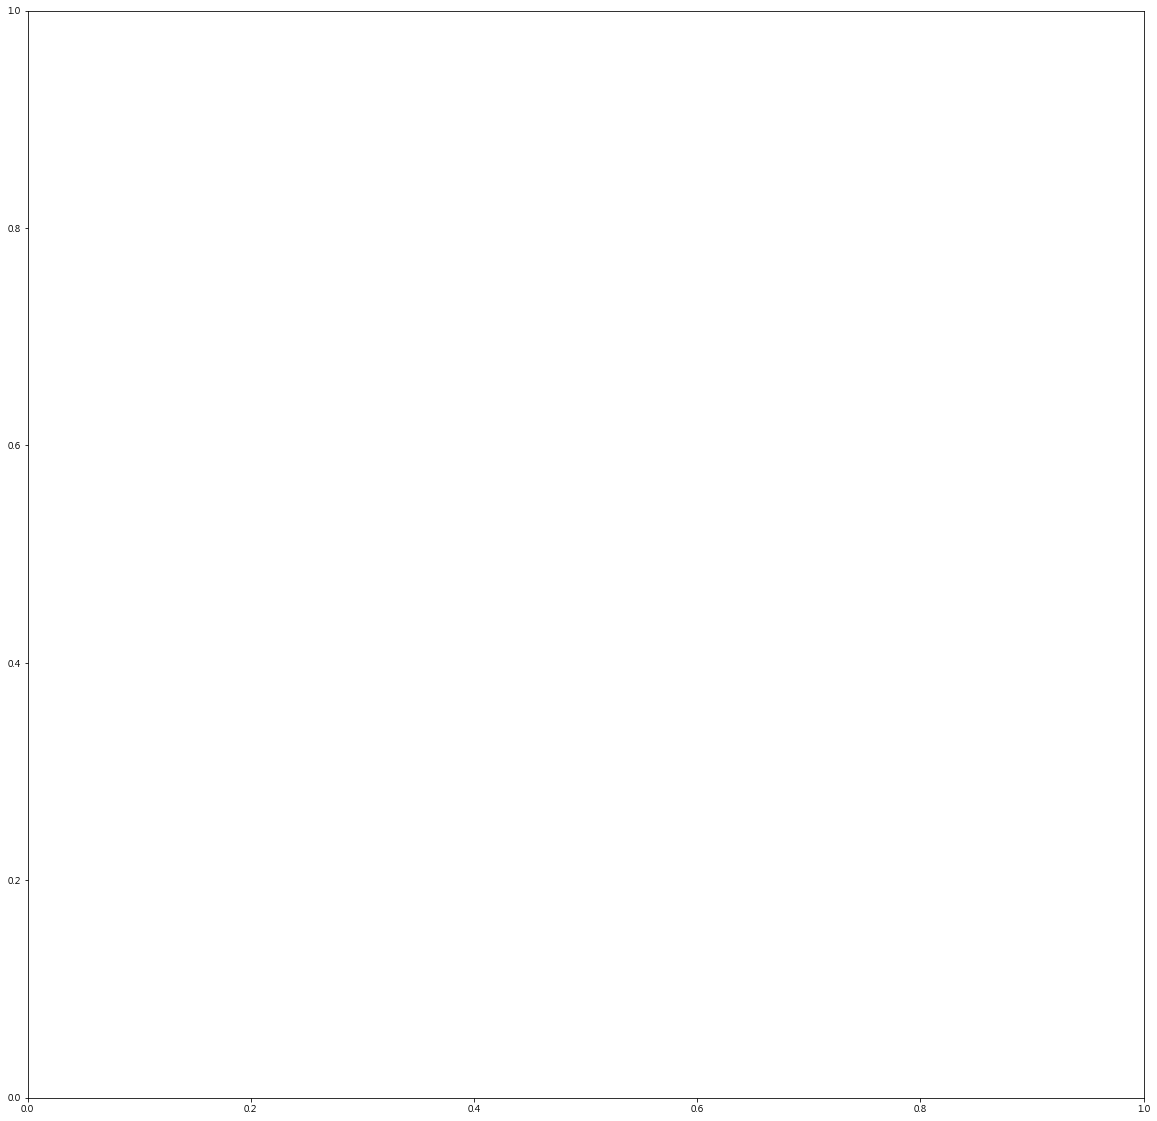

In [690]:
fig.clear('all')
fig, axis= plt.subplots(1)
fig.set_size_inches(20,20)
plt.rc('font', family='Malgun Gothic')
plt.rc('legend', fontsize= 20)

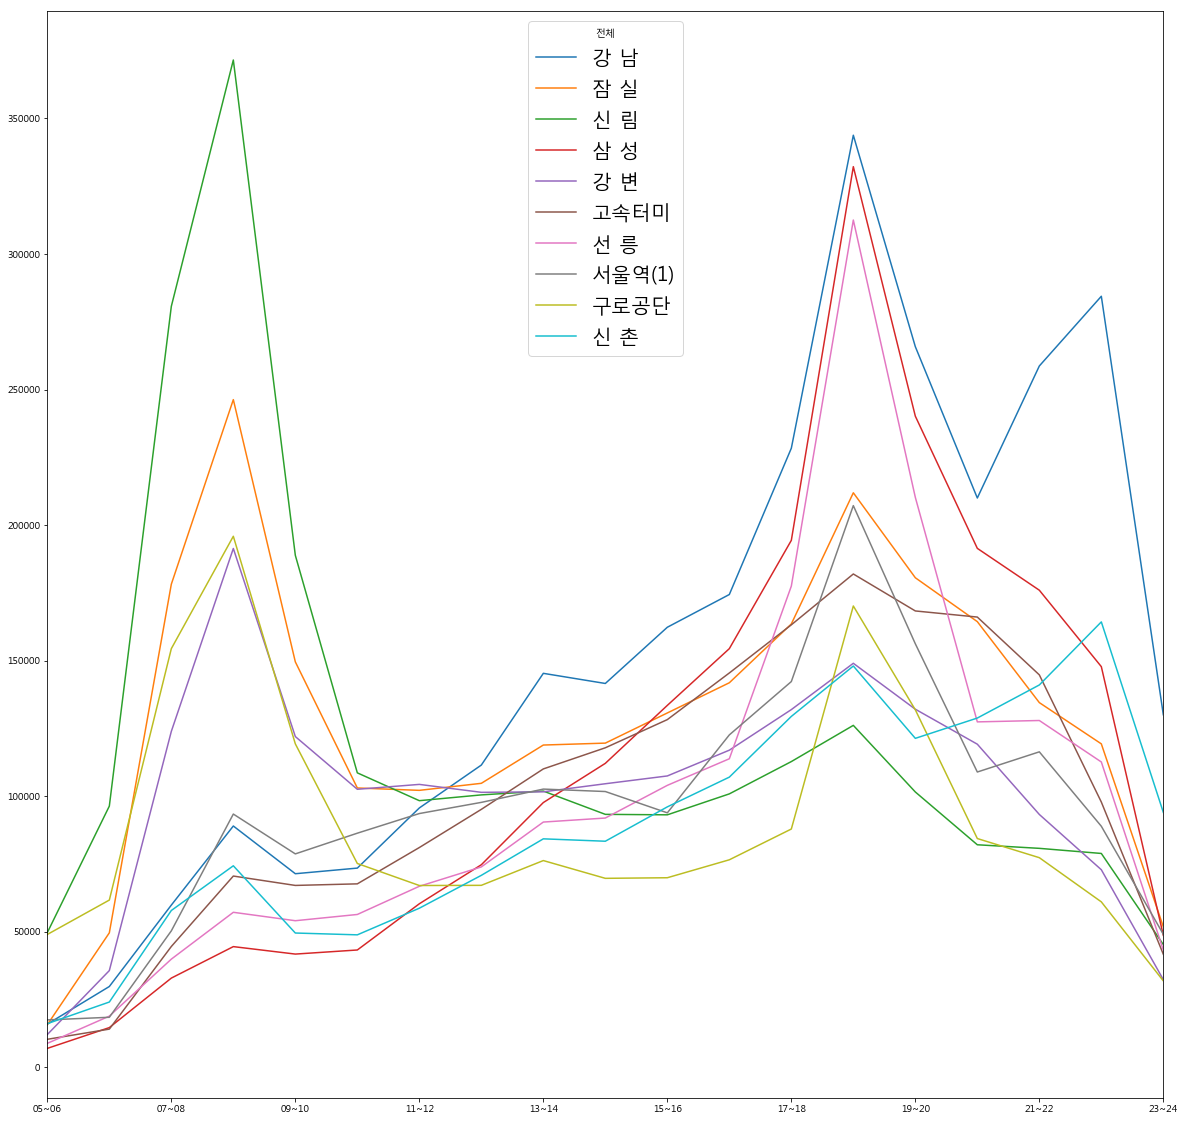

In [691]:
data1T.plot(ax=axis)
fig

### 하차?


In [715]:
data_off= raw[raw['구분']=='하차'].set_index('전체').iloc[:,1:]
data_off

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)   7829  48553  110250  233852  121983   79628   75577   70984   80388   
시 청(1)   4142  19730   67995  175458   83777   48363   47519   42646   45465   
종 각      4861  29757   93579  245221  153933   88680   83402   78253   84694   
종로3(1)   2119  18872   34622  103951  110831   95839   93370   97363  106736   
종로5가     2977  14274   51907  127936   93821   67136   63338   61557   63166   
동대문      3176  11703   18818   41963   39519   38817   42117   45097   45292   
신설동(1)   1991   9248   33809   77567   52622   33818   29901   31321   33285   
제기동      2562  14188   21419   53022   39372   44734   47875   53633   58264   
청량리      5307  24967   41351   72675   74262   74185   72502   77895   86168   
동묘앞       430   3736    9412   34058   21584   14559   14944   18318   21588   
시 청(2)   1776  17387   97659  216553   81613   40417   38851   35886   41671   
을지입구     1832  19798   95314  301554  161928   78929   79215   78458   84275   
을지3(2)   1034  11296   39207  116054   64935   35232   27715   22540   25083   
을지4가      961   8790   26713   93562   59011   33157   29525   25108   24848   
동운(2)     933  11717   28801   67006   38118   37690   39403   41140   47159   
신당       1180   8336   17844   46698   31595   21658   21538   22562   24799   
상왕십리      648   5442   10149   39718   19967   14831   12056   12103   12991   
왕십리      1193   8937   14357   32144   19804   14146   14988   16763   19014   
한양대       780   9259   33967   95911   81421   67447   31943   40587   34141   
뚝 섬      1128  10839   26194   80973   35241   19585   19126   21026   23932   
성 수      2755  23224   53112  179607   58020   26743   26673   23749   23823   
건 대      2387  26365   37209   89681   62500   53102   50020   60886   68047   
구 의      1502  10769   19257   58271   38463   27512   27053   29597   32594   
강 변      4913  50331   66473   91145   94599   81923   82156   87351   99733   
성 내      2023  31286   29473   42351   25494   21692   19775   21602   23090   
잠 실      4488  38364   80853  171584  152610   97828   96179  102451  109821   
신 천      1407  31312   24589   31093   28892   20563   20556   21979   24670   
종합운동     1209  14939   33693   51084   32309   25489   21902   27437   26599   
삼 성      5791  45066  155708  403418  247617  127998  121357  125256  137327   
선 릉      6255  44841  151023  409782  249406  100117   79700   75711   82766   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       158   1613    3300    7418    6350    4956    4630    4880    5467   
대 청       832   6309   15424   26638   13011    9247    9402   10595   11213   
일 원       833  10185   18704   23075   18504   18143   14644   16150   18595   
수 서       352   7298   15603   34937   19503   12949   12961   13357   14519   
당고개        77   8138   11942   21618   18217   18387   15276   15719   16662   
상 계       198  11404   23413   25677   22516   20748   20186   24123   26766   
노 원       667  10015   22426   33692   43923   29215   28759   34561   39858   
창 동      4054  15234   31688   58667   47948   43803   43171   49859   52824   
쌍 문      1247  11647   20839   32417   25370   24432   25871   30053   35003   
수 유      2817  17952   29060   92897   63247   55060   53266   56269   59236   
미 아      1473   8778   18667   32350   23283   20408   21702   24911   27742   
미아3거     2703  13622   24264   43556   47638   32995   37454   41611   46666   
길 음      3474  17873   26713   67012   47575   42498   39088   34641   38795   
성신여대     1402   9749   24954   71209   45001   35482   40912   33416   33257   
한성대      1302  10416   44203   48472   39274   27710   23696   27889   28882   
혜 화      2290  19882   62504  132271  119734   87539   73473   84916  100558   
동대문(4)   1978  20057   57357  106973   90016   68208   58306   51652   52458   
동운(4)   

In [716]:
data_off['total']= data_off.sum(axis=1)
data_off

05~06  06~07   07~08   08~09   09~10   10~11   11~12   12~13   13~14  \
전체                                                                             
서울역(1)   7829  48553  110250  233852  121983   79628   75577   70984   80388   
시 청(1)   4142  19730   67995  175458   83777   48363   47519   42646   45465   
종 각      4861  29757   93579  245221  153933   88680   83402   78253   84694   
종로3(1)   2119  18872   34622  103951  110831   95839   93370   97363  106736   
종로5가     2977  14274   51907  127936   93821   67136   63338   61557   63166   
동대문      3176  11703   18818   41963   39519   38817   42117   45097   45292   
신설동(1)   1991   9248   33809   77567   52622   33818   29901   31321   33285   
제기동      2562  14188   21419   53022   39372   44734   47875   53633   58264   
청량리      5307  24967   41351   72675   74262   74185   72502   77895   86168   
동묘앞       430   3736    9412   34058   21584   14559   14944   18318   21588   
시 청(2)   1776  17387   97659  216553   81613   40417   38851   35886   41671   
을지입구     1832  19798   95314  301554  161928   78929   79215   78458   84275   
을지3(2)   1034  11296   39207  116054   64935   35232   27715   22540   25083   
을지4가      961   8790   26713   93562   59011   33157   29525   25108   24848   
동운(2)     933  11717   28801   67006   38118   37690   39403   41140   47159   
신당       1180   8336   17844   46698   31595   21658   21538   22562   24799   
상왕십리      648   5442   10149   39718   19967   14831   12056   12103   12991   
왕십리      1193   8937   14357   32144   19804   14146   14988   16763   19014   
한양대       780   9259   33967   95911   81421   67447   31943   40587   34141   
뚝 섬      1128  10839   26194   80973   35241   19585   19126   21026   23932   
성 수      2755  23224   53112  179607   58020   26743   26673   23749   23823   
건 대      2387  26365   37209   89681   62500   53102   50020   60886   68047   
구 의      1502  10769   19257   58271   38463   27512   27053   29597   32594   
강 변      4913  50331   66473   91145   94599   81923   82156   87351   99733   
성 내      2023  31286   29473   42351   25494   21692   19775   21602   23090   
잠 실      4488  38364   80853  171584  152610   97828   96179  102451  109821   
신 천      1407  31312   24589   31093   28892   20563   20556   21979   24670   
종합운동     1209  14939   33693   51084   32309   25489   21902   27437   26599   
삼 성      5791  45066  155708  403418  247617  127998  121357  125256  137327   
선 릉      6255  44841  151023  409782  249406  100117   79700   75711   82766   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
학여울       158   1613    3300    7418    6350    4956    4630    4880    5467   
대 청       832   6309   15424   26638   13011    9247    9402   10595   11213   
일 원       833  10185   18704   23075   18504   18143   14644   16150   18595   
수 서       352   7298   15603   34937   19503   12949   12961   13357   14519   
당고개        77   8138   11942   21618   18217   18387   15276   15719   16662   
상 계       198  11404   23413   25677   22516   20748   20186   24123   26766   
노 원       667  10015   22426   33692   43923   29215   28759   34561   39858   
창 동      4054  15234   31688   58667   47948   43803   43171   49859   52824   
쌍 문      1247  11647   20839   32417   25370   24432   25871   30053   35003   
수 유      2817  17952   29060   92897   63247   55060   53266   56269   59236   
미 아      1473   8778   18667   32350   23283   20408   21702   24911   27742   
미아3거     2703  13622   24264   43556   47638   32995   37454   41611   46666   
길 음      3474  17873   26713   67012   47575   42498   39088   34641   38795   
성신여대     1402   9749   24954   71209   45001   35482   40912   33416   33257   
한성대      1302  10416   44203   48472   39274   27710   23696   27889   28882   
혜 화      2290  19882   62504  132271  119734   87539   73473   84916  100558   
동대문(4)   1978  20057   57357  106973   90016   68208   58306   51652   52458   
동운(4)   

In [717]:
# top10on

In [718]:
top10off= list(data_off['total'].rank(ascending=False).sort_values()[:10].index)
top10off

['강 남', '잠 실', '삼 성', '신 림', '고속터미', '강 변', '신 촌', '선 릉', '구로공단', '홍 대']

In [719]:
data_off.loc[top10off][['total']]

total
전체           
강 남   3105252
잠 실   2255165
삼 성   2247358
신 림   2211588
고속터미  1972268
강 변   1900567
신 촌   1842452
선 릉   1814455
구로공단  1756161
홍 대   1718136

In [720]:
data_offT= data_off.loc[top10off].iloc[:,:-2].T
data_offT

전체        강 남     잠 실     삼 성     신 림    고속터미     강 변     신 촌     선 릉    구로공단  \
05~06   13122    4488    5791    4919    5271    4913    4178    6255    7406   
06~07   90820   38364   45066   27335   50769   50331   22263   44841   26232   
07~08  216887   80853  155708   50975   67968   66473   53217  151023   75338   
08~09  412832  171584  403418   85383  104698   91145  135883  409782  264425   
09~10  304197  152610  247617   74558  123633   94599  138311  249406  117729   
10~11  157500   97828  127998   63441  100930   81923  104598  100117   63300   
11~12  134063   96179  121357   64864  111952   82156   88342   79700   56011   
12~13  127664  102451  125256   75674  120239   87351   92577   75711   57475   
13~14  153040  109821  137327   85019  131317   99733  100059   82766   66722   
14~15  149648  114775  134850   89791  139537  109377   97327   79412   68092   
15~16  141022  116516  120329   99229  147091  121359   97548   71963   71229   
16~17  151285  131317  116738  118984  151427  134361  106362   72931   76339   
17~18  187498  152998  118396  145705  158774  144015  136677   82090   92481   
18~19  270297  209881  130726  236677  174867  177143  186474   89002  147576   
19~20  240648  194715  103409  267534  143840  165025  176422   72300  149136   
20~21  127347  128591   52013  189693   86215  117752   99515   45441  100279   
21~22   85620  120020   36756  175710   69329  103595   73395   36093   98569   
22~23   73533  123661   31119  186677   50284   95085   66075   33515  121058   
23~24   50950   85603   18643  132661   28315   61009   47967   22692   77524   

전체        홍 대  
05~06    3342  
06~07   16867  
07~08   45527  
08~09  141583  
09~10  111309  
10~11   70313  
11~12   61165  
12~13   72508  
13~14   86447  
14~15   85289  
15~16   88211  
16~17   99658  
17~18  140782  
18~19  170444  
19~20  178288  
20~21  108983  
21~22   82894  
22~23   73831  
23~24   57524

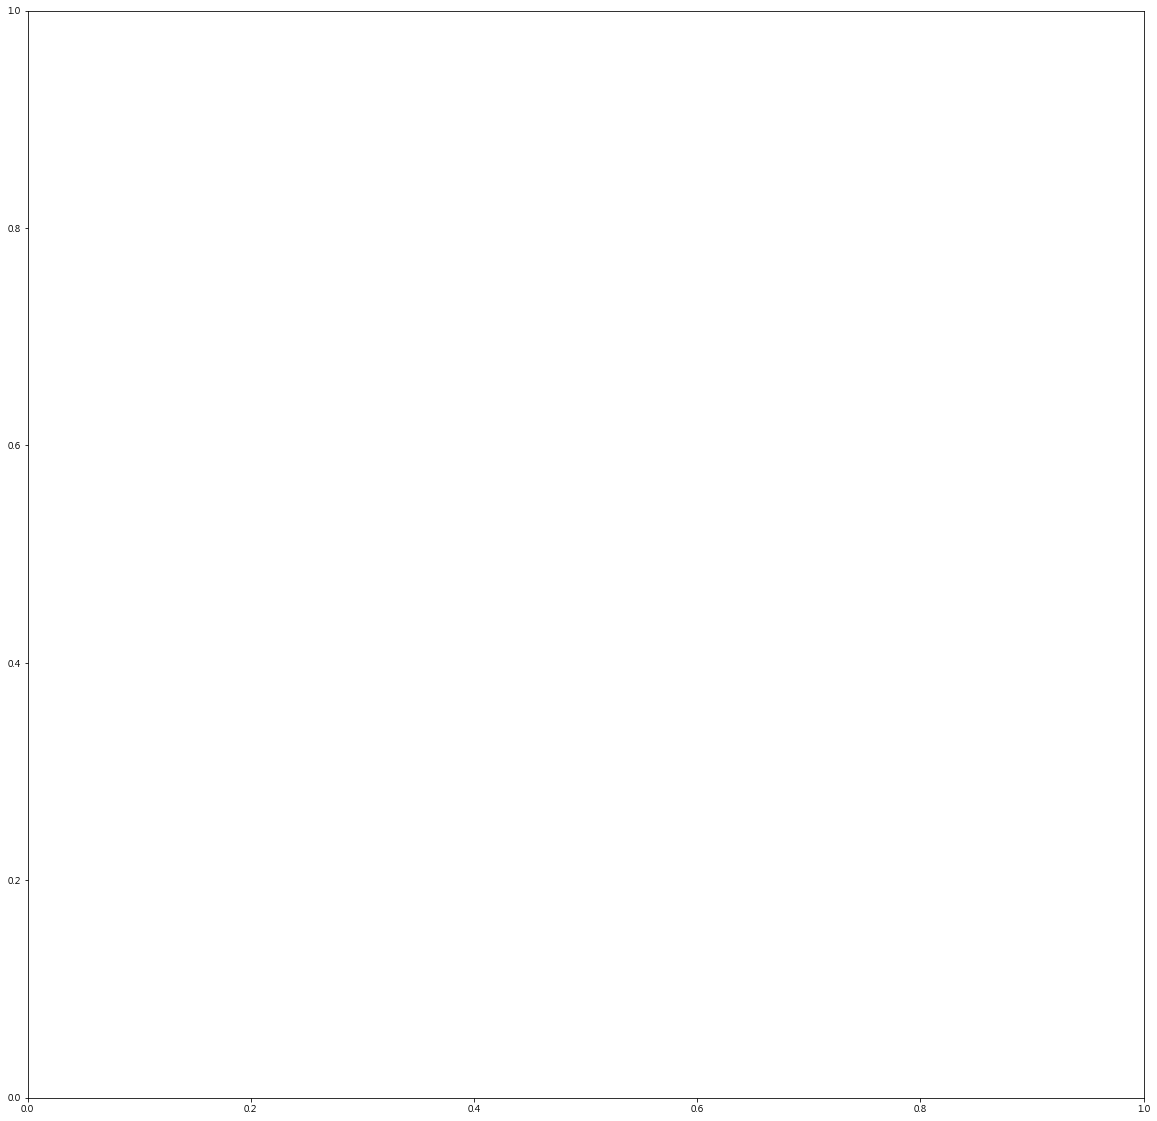

In [721]:
fig.clear('all')
fig, axis= plt.subplots(1)
fig.set_size_inches(20,20)
plt.rc('font', family='Malgun Gothic')
plt.rc('legend', fontsize= 20)

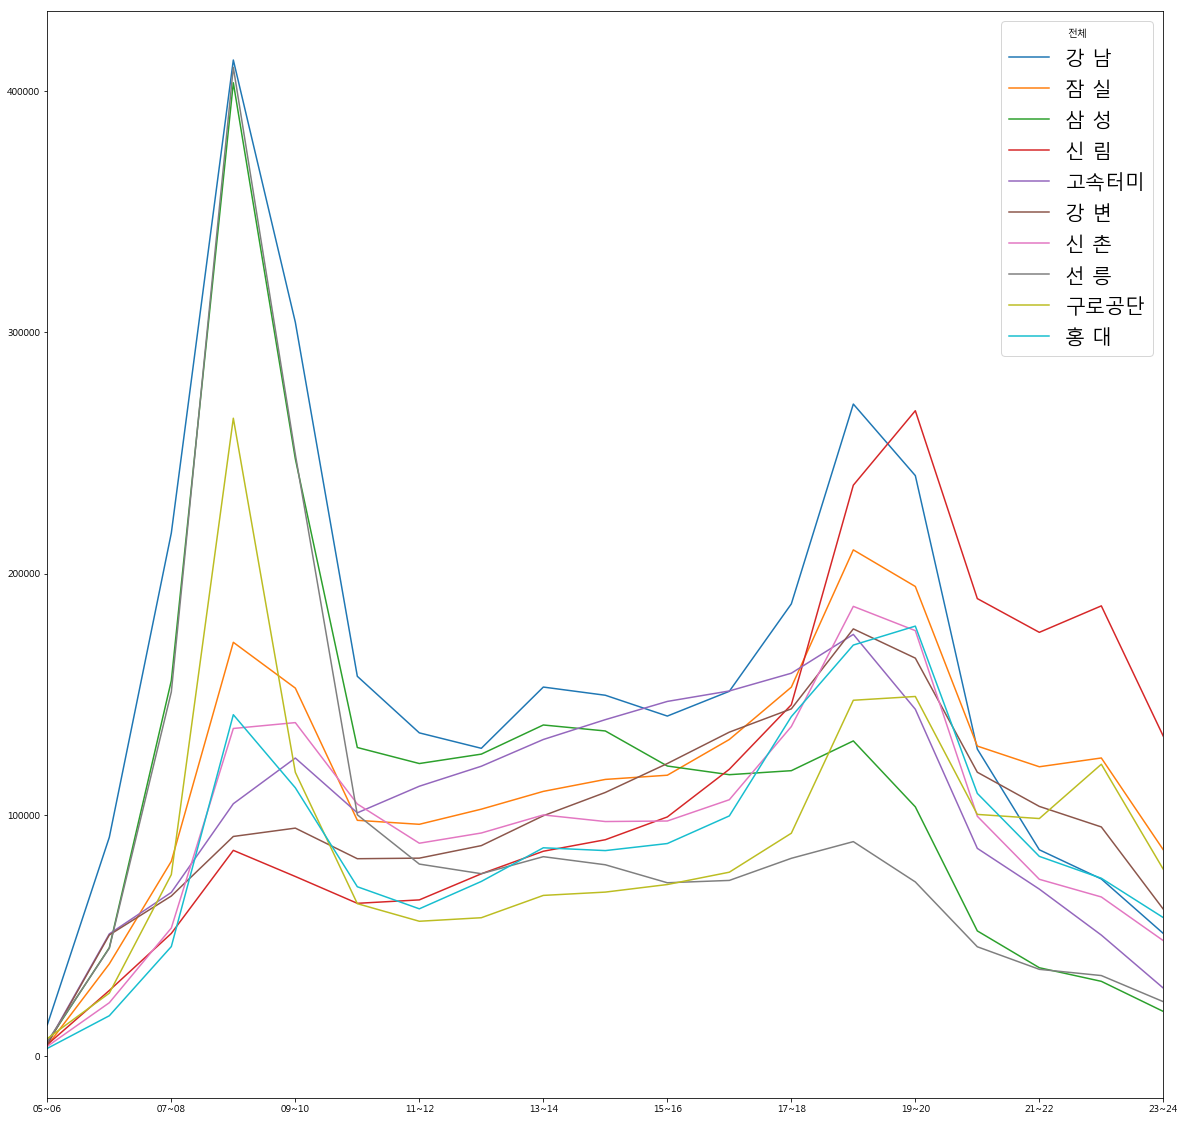

In [722]:
data_offT.plot(ax=axis)
fig

In [724]:
# %save subwayOffTop10.py 715-722

In [729]:
!start .